# Dependencies

In [114]:
path = '/Users/maelfabien/filrouge_pole_emploi/Common/'
local_path = '/Users/maelfabien/Desktop/LocalDB/Videos/'

In [115]:
trump = '/Users/maelfabien/filrouge_pole_emploi/Common/test_samples/trump.jpg'

In [116]:
import cv2
vidcap = cv2.VideoCapture(trump)
success,trump_face = vidcap.read()

In [117]:
shape_x = 225
shape_y = 135

# Initial steps

In [118]:
#Imports
import numpy as np
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import TensorBoard
from time import time
from time import sleep
from keras.models import model_from_json
from keras.optimizers import SGD
from scipy.ndimage import zoom
import os
from __future__ import division
import dlib
from collections import OrderedDict
import argparse
import imutils

In [119]:
emotions = {1 : 'Neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}

In [120]:
#Grab folder
folder = local_path + 'Datas/Actor_1/'
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} videos".format(len(onlyfiles)))

Working with 120 videos


# Video facial emotion recognition using Convolution Neural Networks

## Isolate the face of the person

Usually, information contained in a gray picture is enough. We do not need RGB. Moreover, we only want to focus on the face, not the rest of the image.

### Apply Cascade Filter and return the object

FaceCascade : Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [121]:
def detect_face(frame):
    #Modèle cascade classifier
    cascPath = local_path + '/models/haarcascade_frontalface_default.xml'
    faceCascade = cv2.CascadeClassifier(cascPath)
    
    #BGR -> Gray conversion
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #Cascade MultiScale classifier
    detected_faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=6,
                                                  minSize=(shape_x, shape_y),
                                                  flags=cv2.CASCADE_SCALE_IMAGE)
   
    #if show_border == True :
    #for x,y,w,h in detected_faces:
        #sub_img=frame[y-10:y+h+10,x-10:x+w+10]

        #cv2.rectangle(frame,(x,y),(x+w,y+h),(255, 255,0),5)
                                                  
    return gray, detected_faces

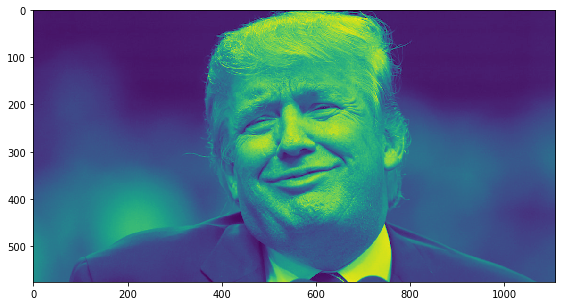

In [122]:
plt.figure(figsize=(14,5))
plt.imshow(detect_face(trump_face)[0])
plt.show()

### Zoom on face and extract face features

In [123]:
#Extraire les features faciales
def extract_face_features(gray, detected_face, offset_coefficients):
    
    #Region dans laquelle la face est détectée
    (x, y, w, h) = detected_face
    #X et y correspondent à la conversion en gris par gray, et w, h correspondent à la hauteur/largeur

    
    #Offset coefficient, np.floor takes the lowest integer (delete border of the image)
    horizontal_offset = np.int(np.floor(offset_coefficients[0] * w))
    vertical_offset = np.int(np.floor(offset_coefficients[1] * h))

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #gray transforme l'image
    extracted_face = gray[y+vertical_offset:y+h, x+horizontal_offset:x-horizontal_offset+w]
    
    #Zoom sur la face extraite
    new_extracted_face = zoom(extracted_face, (shape_x / extracted_face.shape[0],shape_y / extracted_face.shape[1]))
    #cast type float
    new_extracted_face = new_extracted_face.astype(np.float32)
    #scale
    new_extracted_face /= float(new_extracted_face.max())
    #print(new_extracted_face)
    return new_extracted_face

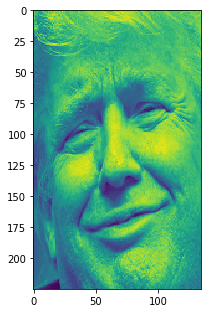

In [124]:
plt.figure(figsize=(3,9))
plt.imshow(extract_face_features(detect_face(trump_face)[0], detect_face(trump_face)[1][0], (0.075, 0.05)))
plt.show()

## Build a dataset from the video inputs

For 1 folder of datas :

In [ ]:
#Output in a .npy file
dataset = np.empty((0, shape_x*shape_y + 1))

j=1
i=1
k=1

for vid in onlyfiles :
    if (vid[0:2] != '02') :

        vidcap = cv2.VideoCapture(folder + vid)
        #success,img = vidcap.read()
        success = True
    
        while success :

            success,img = vidcap.read()
            if not success :
                break

            gray, detected_faces = detect_face(img)
        
            for face in detected_faces :
            
                extracted_face = extract_face_features(gray, face, (0.075, 0.05)) #(0.075, 0.05)

                extracted_face = np.append(extracted_face.flatten(), int(vid[6:8]))
                dataset = np.vstack((dataset, extracted_face))

            i = i + 1
        
        print('Video : '+ str(j))  
    
        j = j + 1

np.save(local_path + 'savedmodels/datas', dataset)

/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Video : 1
Video : 2
Video : 3
Video : 4
Video : 5
Video : 6
Video : 7
Video : 8
Video : 9
Video : 10
Video : 11
Video : 12
Video : 13
Video : 14
Video : 15
Video : 16
Video : 17
Video : 18
Video : 19
Video : 20
Video : 21
Video : 22
Video : 23
Video : 24
Video : 25
Video : 26
Video : 27
Video : 28
Video : 29
Video : 30
Video : 31
Video : 32
Video : 33
Video : 34
Video : 35
Video : 36
Video : 37
Video : 38
Video : 39
Video : 40
Video : 41
Video : 42


For the whole repository :

In [17]:
dataset = np.empty((0, shape_x*shape_y + 1))

j=1
i=1
k=1

for i in range(1,25) :
    folder = local_path + 'Datas/Actor_" + str(i) + "/"
    onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

    for vid in onlyfiles :
    
        vidcap = cv2.VideoCapture(folder + vid)
        #success,img = vidcap.read()
        success = True
    
        while success :

            success,img = vidcap.read()
            if not success :
                break

            gray, detected_faces = detect_face(img)
        
            for face in detected_faces :
            
                extracted_face = extract_face_features(gray, face, (0.075, 0.05)) #(0.075, 0.05)
                extracted_face = np.append(extracted_face.flatten(), int(vid[6:8]))
                dataset = np.vstack((dataset, extracted_face))
        
        print('Video : '+ str(j))  
        j = j + 1
        
    i = i + 1
    
np.save(local_path + 'savedmodels/datas', dataset)

SyntaxError: EOL while scanning string literal (<ipython-input-17-c699a2be17e1>, line 1)

## Build the model

### Train, Test, Split

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.regularizers import l2#, activity_l2
from keras.optimizers import SGD, RMSprop
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

dataset = np.load("/Users/maelfabien/Desktop/LocalDB/Videos/savedmodels/datas.npy")

np.random.seed(2222)  # for reproducibility

#Load the scaled data, both pixels and labels
X = dataset[:,:-1]
y = dataset[:,-1]

In [ ]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
y = y.reshape(len(y), 1)
y = onehot_encoder.fit_transform(y)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
X_test.shape

In [ ]:
#reshape the given pixels into 48 X 48 images
X_train = X_train.reshape(X_train.shape[0] ,shape_x , shape_y,1)
X_test = X_test.reshape(X_test.shape[0] ,shape_x , shape_y,1)

#convert labels to one-hot-encoding
Y_tr_labels = np_utils.to_categorical(y)

### CNN, Tensorboard

<img src = "/Users/maelfabien/filrouge_pole_emploi/Video/Resources/Schema_Emocognizer.png">

In [ ]:
#define the model 32 filters in first convolution layer followed by a max pooling and dense layer with dropout (50%)
model = Sequential()

#nb_filter, nb_row, nb_col
model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(shape_x,shape_y,1)))
model.add(Activation('relu'))
#maxpool
model.add(MaxPooling2D(pool_size=(2, 2)))
#flatten
model.add(Flatten())
#regular densely-connected NN layer, 128 units = dimension of the output space
model.add(Dense(128,init='lecun_uniform'))
#randomly selected neurons are ignored during training
model.add(Dropout(0.4))
model.add(Activation('relu'))
#another layer
model.add(Dense(8))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
#training the model with Stochastic Gradient Descent and nesterov momentum
sgd = SGD(lr=0.055, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=128 , nb_epoch=10, callbacks=[tensorboard])

In [ ]:
#save the model weights
import h5py
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/Model.h5')
open(local_path + 'savedmodels/Model.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

## Make prediction

In [72]:
with open(local_path + 'savedmodels/Model.json','r') as f:
    json = f.read()
loaded_model = model_from_json(json)

loaded_model.load_weights(local_path + 'savedmodels/Model.h5')
print("Loaded model from disk")

Loaded model from disk


In [52]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 98.73%


In [53]:
pred = loaded_model.predict_classes(X_test)
print(pred)

[1 2 4 1 5 6 6 6 3 5 5 1 2 3 6 0 4 7 0 5 6 2 3 7 4 7 5 7 5 2 4 5 1 3 3 7 5
 3 1 1 5 2 7 1 6 5 5 6 3 0 2 0 6 0 6 7 5 6 3 5 1 2 2 3 3 0 5 2 4 4 6 6 2 0
 0 4 1 1 6 3 6 5 6 4 3 4 3 6 0 3 3 4 7 1 5 6 7 6 6 6 1 4 6 0 4 4 7 7 6 3 0
 3 4 4 2 0 5 6 6 1 4 3 6 5 1 7 1 5 1 1 6 5 2 1 0 0 6 3 7 5 0 0 6 7 0 2 3 5
 5 7 4 4 1 5 5 7 1 5 7 7 6 0 2 6 5 5 2 0 4 6 5 1 1 0 2 0 5 5 5 6 1 1 1 0 5
 4 6 5 5 0 7 3 4 5 3 2 4 0 1 4 6 1 4 1 1 4 1 2 7 2 6 6 2 4 1 5 4 3 2 2 5 3
 2 6 0 3 7 6 6 5 1 4 3 6 3 4 0 0 1 7 6 2 5 1 4 6 2 7 3 1 5 5 1 5 1 1 0 1 6
 5 2 4 6 1 7 2 2 2 2 7 3 1 6 6 0 5 0 3 4 0 5 5 6 2 5 3 5 4 3 0 1 4 1 5 3 5
 4 7 5 7 6 0 5 3 3 6 0 5 2 0 3 5 4 5]


## Live output CNN prediction

In [73]:
#cascPath = "haarcascade_frontalface_default.xml
#faceCascade = cv2.CascadeClassifier(cascPath)

#Lancer la capture video
video_capture = cv2.VideoCapture(0)

emotion = []

while True:
    # Capture frame-by-frame
    # sleep(0.8)
    ret, frame = video_capture.read()

    #Detecter les faces
    gray, detected_faces = detect_face(frame)
    
    #Initialier l'index à 0
    face_index = 0
    
    #Predire l'output pour chaque tête
    for face in detected_faces:
        
        (x, y, w, h) = face
        
        #Détecter seulement si la largeur est > 200
        if w > 200 :
            
            #Dessiner rectangle autour de la tête
            #cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            #Extraire les features
            extracted_face = extract_face_features(gray, face, (0.075, 0.05)) #(0.075, 0.05)

            # predict smile
            prediction_result = loaded_model.predict_classes(extracted_face.reshape(1,shape_x,shape_y,1))

            # draw extracted face in the top right corner
            frame[face_index * shape_x: (face_index + 1) * shape_x, -1 * shape_y - 1:-1, :] = cv2.cvtColor(extracted_face * 255, cv2.COLOR_GRAY2RGB)

            # annotate main image with a label
            if prediction_result == 3 :
                cv2.putText(frame, "Happy",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
            elif prediction_result == 0 :
                cv2.putText(frame, "Angry",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
            elif prediction_result == 1 :
                cv2.putText(frame, "Disgust",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
            elif prediction_result == 2 :
                cv2.putText(frame, "Fear",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
            elif prediction_result == 4 :
                cv2.putText(frame, "Sad",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
            elif prediction_result == 5 :
                cv2.putText(frame, "Surprise",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
            else :
                cv2.putText(frame, "Neutral",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
           
            emotion.append(prediction_result)
            print(prediction_result[0])

            # increment counter
            face_index += 1
                

    # Display the resulting frame
    cv2.imshow('Video', frame)
    #print(emotion)
#cv2.imshow("Mask", mask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

6
6
6
6
6
6
6
6
6
6


/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


KeyboardInterrupt: 

# Video facial emotion recognition with facial features

## Extract facial landmarks

### On an image

In [ ]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/Users/maelfabien/Desktop/LocalDB/Videos/landmarks/shape_predictor_68_face_landmarks.dat 2')

In [ ]:
# import the necessary packages
facial_features_cordinates = {}

# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_INDEXES = OrderedDict([
    ("Mouth", (48, 68)),
    ("Right_Eyebrow", (17, 22)),
    ("Left_Eyebrow", (22, 27)),
    ("Right_Eye", (36, 42)),
    ("Left_Eye", (42, 48)),
    ("Nose", (27, 35)),
    ("Jaw", (0, 17))
])

In [ ]:
def resize(img, width=None, height=None, interpolation=cv2.INTER_AREA):
    global ratio
    w, h = img.shape

    if width is None and height is None:
        return img
    elif width is None:
        ratio = height / h
        width = int(w * ratio)
        resized = cv2.resize(img, (height, width), interpolation)
        return resized
    else:
        ratio = width / w
        height = int(h * ratio)
        resized = cv2.resize(img, (height, width), interpolation)
        return resized

In [ ]:
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

In [ ]:
def shape_to_numpy_array(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coordinates = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coordinates[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coordinates

In [ ]:
def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
    # create two copies of the input image -- one for the
    # overlay and one for the final output image
    overlay = image.copy()
    output = image.copy()

    # if the colors list is None, initialize it with a unique
    # color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
                  (168, 100, 168), (158, 163, 32),
                  (163, 38, 32), (180, 42, 220)]

    # loop over the facial landmark regions individually
    for (i, name) in enumerate(FACIAL_LANDMARKS_INDEXES.keys()):
        # grab the (x, y)-coordinates associated with the
        # face landmark
        (j, k) = FACIAL_LANDMARKS_INDEXES[name]
        pts = shape[j:k]
        facial_features_cordinates[name] = pts

        # check if are supposed to draw the jawline
        if name == "Jaw":
            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull of the facial
        # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    # apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # return the output image
    print(facial_features_cordinates)
    return output

In [97]:
#camera = cv2.VideoCapture(0)

predictor_path = '/Users/maelfabien/Desktop/LocalDB/Videos/landmarks/shape_predictor_68_face_landmarks.dat 2'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

def feat_img(frame) :
    frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_resized = resize(frame_grey, width=120)
    
    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    dets = detector(frame_resized, 1)
    print(dets)
    if len(dets) > 0:
        for k, d in enumerate(dets):
            # determine the facial landmarks for the face region, then
            # convert the facial landmark (x, y)-coordinates to a NumPy array
            shape = predictor(frame_resized, d)
            shape = shape_to_np(shape)

            # loop over the (x, y)-coordinates for the facial landmarks
            # and draw them on the image
            for (x, y) in shape:
                cv2.circle(frame_resized, (int(x/ratio), int(y/ratio)), 3, (255, 255, 255), -1)
    plt.figure(figsize=(12,8))
    plt.imshow(frame_resized)
    plt.show()

rectangles[[(66, 7) (155, 96)]]


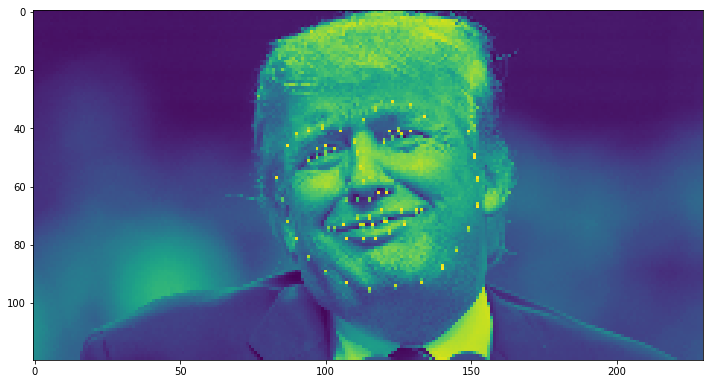

In [98]:
feat_img(trump_face)

### On a live video

In [68]:
camera = cv2.VideoCapture(0)

predictor_path = '/Users/maelfabien/Desktop/LocalDB/Videos/landmarks/shape_predictor_68_face_landmarks.dat 2'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

while True:

    ret, frame = camera.read()
    if ret == False:
        print('Failed to capture frame from camera. Check camera index in cv2.VideoCapture(0) \n')
        break

    frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_resized = resize(frame_grey, width=120)

    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    dets = detector(frame_resized, 1)
    if len(dets) > 0:
        for k, d in enumerate(dets):
            # determine the facial landmarks for the face region, then
            # convert the facial landmark (x, y)-coordinates to a NumPy array
            shape = predictor(frame_resized, d)
            shape = shape_to_np(shape)

            # loop over the (x, y)-coordinates for the facial landmarks
            # and draw them on the image
            for (x, y) in shape:
                cv2.circle(frame, (int(x/ratio), int(y/ratio)), 3, (255, 255, 255), -1)
                print(cv2.circle(frame, (int(x/ratio), int(y/ratio)), 3, (255, 255, 255), -1))
            #cv2.rectangle(frame, (int(d.left()/ratio), int(d.top()/ratio)),(int(d.right()/ratio), int(d.bottom()/ratio)), (0, 255, 0), 1)

    cv2.imshow("image", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

[[[135 143 160]
  [137 145 162]
  [133 143 160]
  ...
  [160 196 213]
  [162 197 214]
  [158 193 210]]

 [[136 144 161]
  [136 144 161]
  [131 142 158]
  ...
  [160 196 213]
  [162 197 214]
  [158 193 210]]

 [[139 146 166]
  [135 142 161]
  [131 142 158]
  ...
  [160 196 213]
  [162 197 214]
  [158 193 210]]

 ...

 [[116 137 150]
  [125 145 158]
  [123 144 157]
  ...
  [ 71  86 123]
  [ 66  79 116]
  [ 52  65 102]]

 [[115 135 150]
  [123 143 158]
  [123 143 158]
  ...
  [ 69  84 120]
  [ 63  76 112]
  [ 57  70 106]]

 [[115 135 150]
  [122 142 157]
  [122 142 157]
  ...
  [ 78  93 130]
  [ 69  81 118]
  [ 66  79 116]]]
[[[135 143 160]
  [137 145 162]
  [133 143 160]
  ...
  [160 196 213]
  [162 197 214]
  [158 193 210]]

 [[136 144 161]
  [136 144 161]
  [131 142 158]
  ...
  [160 196 213]
  [162 197 214]
  [158 193 210]]

 [[139 146 166]
  [135 142 161]
  [131 142 158]
  ...
  [160 196 213]
  [162 197 214]
  [158 193 210]]

 ...

 [[116 137 150]
  [125 145 158]
  [123 144 157]
  ..

[[[137 143 165]
  [136 142 164]
  [133 141 158]
  ...
  [161 194 212]
  [160 193 210]
  [160 193 210]]

 [[133 140 162]
  [135 141 163]
  [135 143 160]
  ...
  [160 193 210]
  [160 193 210]
  [160 193 210]]

 [[131 140 162]
  [131 140 162]
  [138 148 167]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 ...

 [[126 141 159]
  [122 136 154]
  [122 136 154]
  ...
  [ 82  95 136]
  [ 76  89 130]
  [ 69  82 123]]

 [[116 136 153]
  [115 134 152]
  [113 132 149]
  ...
  [ 74  90 130]
  [ 73  89 129]
  [ 69  85 126]]

 [[118 137 154]
  [114 133 151]
  [111 130 147]
  ...
  [ 72  87 128]
  [ 75  91 132]
  [ 75  91 132]]]
[[[137 143 165]
  [136 142 164]
  [133 141 158]
  ...
  [161 194 212]
  [160 193 210]
  [160 193 210]]

 [[133 140 162]
  [135 141 163]
  [135 143 160]
  ...
  [160 193 210]
  [160 193 210]
  [160 193 210]]

 [[131 140 162]
  [131 140 162]
  [138 148 167]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 ...

 [[126 141 159]
  [122 136 154]
  [122 136 154]
  ..

[[[140 146 163]
  [139 145 162]
  [135 143 158]
  ...
  [168 196 214]
  [165 193 212]
  [165 193 212]]

 [[137 142 160]
  [137 142 160]
  [133 142 157]
  ...
  [168 196 214]
  [167 195 213]
  [167 195 213]]

 [[135 141 158]
  [137 142 160]
  [137 146 160]
  ...
  [164 192 210]
  [165 193 212]
  [165 193 212]]

 ...

 [[109 129 144]
  [116 136 151]
  [123 143 158]
  ...
  [ 82  99 137]
  [ 73  89 128]
  [ 73  89 128]]

 [[109 136 150]
  [109 136 150]
  [118 143 157]
  ...
  [ 83 101 137]
  [ 72  88 127]
  [ 70  87 125]]

 [[116 143 157]
  [111 139 153]
  [118 143 157]
  ...
  [ 72  89 125]
  [ 72  88 127]
  [ 72  88 127]]]
[[[140 146 163]
  [139 145 162]
  [135 143 158]
  ...
  [168 196 214]
  [165 193 212]
  [165 193 212]]

 [[137 142 160]
  [137 142 160]
  [133 142 157]
  ...
  [168 196 214]
  [167 195 213]
  [167 195 213]]

 [[135 141 158]
  [137 142 160]
  [137 146 160]
  ...
  [164 192 210]
  [165 193 212]
  [165 193 212]]

 ...

 [[109 129 144]
  [116 136 151]
  [123 143 158]
  ..

[[[157 160 180]
  [144 147 167]
  [144 149 167]
  ...
  [166 190 214]
  [166 190 214]
  [166 190 214]]

 [[154 156 176]
  [140 142 162]
  [140 146 163]
  ...
  [165 189 212]
  [165 189 212]
  [165 189 212]]

 [[146 150 172]
  [137 141 163]
  [133 140 153]
  ...
  [165 189 212]
  [165 189 212]
  [165 189 212]]

 ...

 [[125 144 157]
  [125 144 157]
  [124 143 156]
  ...
  [ 80  93 130]
  [ 86  99 135]
  [ 83  95 132]]

 [[123 144 157]
  [123 144 157]
  [122 143 156]
  ...
  [ 83  95 132]
  [ 81  94 131]
  [ 80  93 130]]

 [[125 145 158]
  [125 145 158]
  [123 144 157]
  ...
  [ 78  91 127]
  [ 83  95 132]
  [ 87 100 137]]]
[[[157 160 180]
  [144 147 167]
  [144 149 167]
  ...
  [166 190 214]
  [166 190 214]
  [166 190 214]]

 [[154 156 176]
  [140 142 162]
  [140 146 163]
  ...
  [165 189 212]
  [165 189 212]
  [165 189 212]]

 [[146 150 172]
  [137 141 163]
  [133 140 153]
  ...
  [165 189 212]
  [165 189 212]
  [165 189 212]]

 ...

 [[125 144 157]
  [125 144 157]
  [124 143 156]
  ..

[[[144 148 165]
  [147 150 168]
  [142 149 164]
  ...
  [166 197 212]
  [163 195 210]
  [163 195 210]]

 [[140 143 161]
  [141 144 162]
  [140 147 161]
  ...
  [166 197 212]
  [163 195 210]
  [163 195 210]]

 [[139 140 163]
  [138 139 162]
  [133 138 158]
  ...
  [166 197 212]
  [163 195 210]
  [163 195 210]]

 ...

 [[ 97 120 139]
  [112 136 155]
  [117 140 159]
  ...
  [ 76  93 131]
  [ 75  92 130]
  [ 82  99 137]]

 [[ 92 117 136]
  [107 132 151]
  [110 136 155]
  ...
  [ 76  93 131]
  [ 75  92 130]
  [ 82  99 137]]

 [[113 138 157]
  [117 143 162]
  [114 139 158]
  ...
  [ 73  89 128]
  [ 69  86 124]
  [ 82  99 137]]]
[[[144 148 165]
  [147 150 168]
  [142 149 164]
  ...
  [166 197 212]
  [163 195 210]
  [163 195 210]]

 [[140 143 161]
  [141 144 162]
  [140 147 161]
  ...
  [166 197 212]
  [163 195 210]
  [163 195 210]]

 [[139 140 163]
  [138 139 162]
  [133 138 158]
  ...
  [166 197 212]
  [163 195 210]
  [163 195 210]]

 ...

 [[ 97 120 139]
  [112 136 155]
  [117 140 159]
  ..

[[[136 149 165]
  [132 145 161]
  [134 148 161]
  ...
  [166 194 217]
  [166 194 217]
  [165 193 216]]

 [[134 147 163]
  [132 145 161]
  [132 145 159]
  ...
  [165 193 216]
  [165 193 216]
  [162 191 214]]

 [[135 145 162]
  [135 145 162]
  [138 150 164]
  ...
  [162 191 214]
  [162 191 214]
  [161 190 212]]

 ...

 [[110 138 150]
  [113 141 152]
  [116 141 153]
  ...
  [ 80 102 139]
  [ 82 103 141]
  [ 79 101 138]]

 [[112 142 153]
  [113 143 154]
  [117 145 157]
  ...
  [ 77 101 138]
  [ 75  99 136]
  [ 71  95 132]]

 [[111 141 152]
  [116 147 158]
  [116 144 156]
  ...
  [ 75  99 136]
  [ 73  96 134]
  [ 70  94 131]]]
[[[136 149 165]
  [132 145 161]
  [134 148 161]
  ...
  [166 194 217]
  [166 194 217]
  [165 193 216]]

 [[134 147 163]
  [132 145 161]
  [132 145 159]
  ...
  [165 193 216]
  [165 193 216]
  [162 191 214]]

 [[135 145 162]
  [135 145 162]
  [138 150 164]
  ...
  [162 191 214]
  [162 191 214]
  [161 190 212]]

 ...

 [[110 138 150]
  [113 141 152]
  [116 141 153]
  ..

[[[139 148 163]
  [138 147 161]
  [139 145 162]
  ...
  [169 193 214]
  [169 193 214]
  [169 193 214]]

 [[139 148 163]
  [138 147 161]
  [139 145 162]
  ...
  [169 193 214]
  [169 193 214]
  [169 193 214]]

 [[139 148 163]
  [138 147 161]
  [139 145 162]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 ...

 [[113 136 150]
  [113 136 150]
  [114 137 151]
  ...
  [ 88 101 151]
  [ 81  94 144]
  [ 74  87 137]]

 [[114 141 155]
  [114 141 155]
  [114 141 155]
  ...
  [ 88 101 151]
  [ 84  97 147]
  [ 74  87 137]]

 [[115 142 156]
  [115 142 156]
  [115 142 156]
  ...
  [ 86  98 149]
  [ 84  97 147]
  [ 72  84 135]]]
[[[139 148 163]
  [138 147 161]
  [139 145 162]
  ...
  [169 193 214]
  [169 193 214]
  [169 193 214]]

 [[139 148 163]
  [138 147 161]
  [139 145 162]
  ...
  [169 193 214]
  [169 193 214]
  [169 193 214]]

 [[139 148 163]
  [138 147 161]
  [139 145 162]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 ...

 [[113 136 150]
  [113 136 150]
  [114 137 151]
  ..

[[[138 148 160]
  [140 150 162]
  [140 150 162]
  ...
  [166 195 216]
  [166 195 216]
  [166 195 216]]

 [[133 143 155]
  [136 145 157]
  [140 150 162]
  ...
  [166 195 216]
  [166 195 216]
  [166 195 216]]

 [[134 141 156]
  [133 140 154]
  [133 140 154]
  ...
  [166 195 216]
  [166 195 216]
  [166 195 216]]

 ...

 [[123 137 155]
  [125 139 158]
  [122 139 156]
  ...
  [ 79 102 148]
  [ 73  96 142]
  [ 76  99 146]]

 [[118 135 153]
  [120 136 154]
  [116 136 153]
  ...
  [ 75  99 143]
  [ 68  92 136]
  [ 73  97 141]]

 [[118 135 153]
  [120 136 154]
  [120 139 156]
  ...
  [ 72  96 140]
  [ 68  92 136]
  [ 66  90 134]]]
[[[138 148 160]
  [140 150 162]
  [140 150 162]
  ...
  [166 195 216]
  [166 195 216]
  [166 195 216]]

 [[133 143 155]
  [136 145 157]
  [140 150 162]
  ...
  [166 195 216]
  [166 195 216]
  [166 195 216]]

 [[134 141 156]
  [133 140 154]
  [133 140 154]
  ...
  [166 195 216]
  [166 195 216]
  [166 195 216]]

 ...

 [[123 137 155]
  [125 139 158]
  [122 139 156]
  ..

[[[136 145 157]
  [132 142 154]
  [136 145 157]
  ...
  [165 195 213]
  [162 193 210]
  [162 193 210]]

 [[137 147 159]
  [131 141 153]
  [133 143 155]
  ...
  [165 195 213]
  [162 193 210]
  [162 193 210]]

 [[132 145 159]
  [126 140 153]
  [128 142 156]
  ...
  [166 196 214]
  [163 194 212]
  [163 194 212]]

 ...

 [[115 131 151]
  [117 133 153]
  [118 134 155]
  ...
  [ 82 101 144]
  [ 80 100 143]
  [ 79  99 141]]

 [[114 132 154]
  [116 134 156]
  [116 134 156]
  ...
  [ 79  99 141]
  [ 79  99 141]
  [ 80 100 143]]

 [[115 133 155]
  [116 134 156]
  [116 134 156]
  ...
  [ 78  98 140]
  [ 79  99 141]
  [ 80 100 143]]]
[[[136 145 157]
  [132 142 154]
  [136 145 157]
  ...
  [165 195 213]
  [162 193 210]
  [162 193 210]]

 [[137 147 159]
  [131 141 153]
  [133 143 155]
  ...
  [165 195 213]
  [162 193 210]
  [162 193 210]]

 [[132 145 159]
  [126 140 153]
  [128 142 156]
  ...
  [166 196 214]
  [163 194 212]
  [163 194 212]]

 ...

 [[115 131 151]
  [117 133 153]
  [118 134 155]
  ..

[[[136 150 164]
  [135 149 163]
  [135 149 163]
  ...
  [164 191 212]
  [164 191 212]
  [164 191 212]]

 [[131 144 158]
  [132 145 159]
  [133 147 160]
  ...
  [164 191 212]
  [164 191 212]
  [164 191 212]]

 [[131 143 157]
  [131 143 157]
  [133 144 158]
  ...
  [164 191 212]
  [164 191 212]
  [164 191 212]]

 ...

 [[117 141 150]
  [118 142 152]
  [118 142 152]
  ...
  [ 88 106 147]
  [ 81 100 140]
  [ 75  94 134]]

 [[114 143 152]
  [116 145 154]
  [117 146 155]
  ...
  [ 86 104 144]
  [ 83  99 140]
  [ 77  93 134]]

 [[110 139 148]
  [115 144 153]
  [117 146 155]
  ...
  [ 79  97 137]
  [ 80  96 136]
  [ 82  98 139]]]
[[[136 150 164]
  [135 149 163]
  [135 149 163]
  ...
  [164 191 212]
  [164 191 212]
  [164 191 212]]

 [[131 144 158]
  [132 145 159]
  [133 147 160]
  ...
  [164 191 212]
  [164 191 212]
  [164 191 212]]

 [[131 143 157]
  [131 143 157]
  [133 144 158]
  ...
  [164 191 212]
  [164 191 212]
  [164 191 212]]

 ...

 [[117 141 150]
  [118 142 152]
  [118 142 152]
  ..

[[[139 147 164]
  [136 144 161]
  [139 147 164]
  ...
  [163 194 212]
  [163 194 212]
  [163 194 212]]

 [[137 145 162]
  [132 140 157]
  [136 144 161]
  ...
  [163 194 212]
  [163 194 212]
  [163 194 212]]

 [[132 135 153]
  [128 131 149]
  [133 139 156]
  ...
  [163 194 212]
  [163 194 212]
  [163 194 212]]

 ...

 [[114 137 151]
  [116 138 153]
  [117 139 154]
  ...
  [ 74  99 147]
  [ 78 103 151]
  [ 71  96 144]]

 [[119 144 158]
  [119 144 158]
  [118 143 157]
  ...
  [ 73  98 146]
  [ 78 103 151]
  [ 70  94 143]]

 [[117 142 156]
  [117 142 156]
  [115 140 154]
  ...
  [ 72  97 145]
  [ 73  98 146]
  [ 66  91 139]]]
[[[139 147 164]
  [136 144 161]
  [139 147 164]
  ...
  [163 194 212]
  [163 194 212]
  [163 194 212]]

 [[137 145 162]
  [132 140 157]
  [136 144 161]
  ...
  [163 194 212]
  [163 194 212]
  [163 194 212]]

 [[132 135 153]
  [128 131 149]
  [133 139 156]
  ...
  [163 194 212]
  [163 194 212]
  [163 194 212]]

 ...

 [[114 137 151]
  [116 138 153]
  [117 139 154]
  ..

[[[140 146 163]
  [142 148 165]
  [136 144 161]
  ...
  [165 193 212]
  [165 193 212]
  [168 196 214]]

 [[139 145 162]
  [139 145 162]
  [136 144 161]
  ...
  [165 193 212]
  [165 193 212]
  [167 195 213]]

 [[140 142 162]
  [138 140 160]
  [138 143 162]
  ...
  [164 192 210]
  [164 192 210]
  [165 193 212]]

 ...

 [[119 141 156]
  [118 140 155]
  [115 135 150]
  ...
  [ 76  98 142]
  [ 73  94 138]
  [ 75  96 141]]

 [[121 144 158]
  [118 140 155]
  [113 136 150]
  ...
  [ 78 100 144]
  [ 74  95 140]
  [ 73  94 138]]

 [[125 147 162]
  [119 141 156]
  [113 136 150]
  ...
  [ 80 101 145]
  [ 77  99 143]
  [ 74  95 140]]]
[[[140 146 163]
  [142 148 165]
  [136 144 161]
  ...
  [165 193 212]
  [165 193 212]
  [168 196 214]]

 [[139 145 162]
  [139 145 162]
  [136 144 161]
  ...
  [165 193 212]
  [165 193 212]
  [167 195 213]]

 [[140 142 162]
  [138 140 160]
  [138 143 162]
  ...
  [164 192 210]
  [164 192 210]
  [165 193 212]]

 ...

 [[119 141 156]
  [118 140 155]
  [115 135 150]
  ..

[[[146 149 167]
  [143 146 164]
  [139 142 160]
  ...
  [166 192 210]
  [163 188 207]
  [160 186 205]]

 [[144 148 165]
  [143 146 164]
  [140 143 161]
  ...
  [169 194 213]
  [166 192 210]
  [164 189 208]]

 [[143 146 164]
  [142 145 163]
  [142 145 163]
  ...
  [169 194 213]
  [167 193 212]
  [166 192 210]]

 ...

 [[119 140 152]
  [118 138 151]
  [118 138 151]
  ...
  [ 78 101 143]
  [ 82 104 146]
  [ 84 106 148]]

 [[113 136 149]
  [113 136 149]
  [119 142 154]
  ...
  [ 77 100 141]
  [ 78 101 143]
  [ 78 101 143]]

 [[116 139 151]
  [114 138 150]
  [118 141 153]
  ...
  [ 76  98 140]
  [ 75  97 139]
  [ 73  95 137]]]
[[[146 149 167]
  [143 146 164]
  [139 142 160]
  ...
  [166 192 210]
  [163 188 207]
  [160 186 205]]

 [[144 148 165]
  [143 146 164]
  [140 143 161]
  ...
  [169 194 213]
  [166 192 210]
  [164 189 208]]

 [[143 146 164]
  [142 145 163]
  [142 145 163]
  ...
  [169 194 213]
  [167 193 212]
  [166 192 210]]

 ...

 [[119 140 152]
  [118 138 151]
  [118 138 151]
  ..

[[[138 152 159]
  [138 152 159]
  [140 152 162]
  ...
  [166 191 212]
  [166 191 212]
  [166 191 212]]

 [[137 151 158]
  [135 149 155]
  [136 149 158]
  ...
  [166 191 212]
  [166 191 212]
  [166 191 212]]

 [[135 148 157]
  [131 144 154]
  [128 141 150]
  ...
  [167 194 214]
  [167 194 214]
  [167 194 214]]

 ...

 [[121 140 158]
  [121 140 158]
  [120 139 156]
  ...
  [ 79  99 141]
  [ 78  98 140]
  [ 69  89 131]]

 [[118 139 156]
  [119 141 158]
  [120 142 159]
  ...
  [ 78  98 140]
  [ 71  91 133]
  [ 70  90 132]]

 [[117 138 155]
  [118 139 156]
  [119 141 158]
  ...
  [ 77  97 139]
  [ 79  99 141]
  [ 75  94 137]]]
[[[138 152 159]
  [138 152 159]
  [140 152 162]
  ...
  [166 191 212]
  [166 191 212]
  [166 191 212]]

 [[137 151 158]
  [135 149 155]
  [136 149 158]
  ...
  [166 191 212]
  [166 191 212]
  [166 191 212]]

 [[135 148 157]
  [131 144 154]
  [128 141 150]
  ...
  [167 194 214]
  [167 194 214]
  [167 194 214]]

 ...

 [[121 140 158]
  [121 140 158]
  [120 139 156]
  ..

[[[136 149 158]
  [136 149 158]
  [135 147 159]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 [[134 147 156]
  [136 149 158]
  [134 146 157]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 [[136 145 159]
  [135 143 158]
  [133 142 157]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 ...

 [[120 138 158]
  [119 137 157]
  [115 134 153]
  ...
  [ 79  97 137]
  [ 72  90 130]
  [ 68  87 127]]

 [[121 142 162]
  [121 142 162]
  [119 140 159]
  ...
  [ 80  98 139]
  [ 73  91 132]
  [ 71  89 129]]

 [[121 142 162]
  [120 141 160]
  [120 141 160]
  ...
  [ 81 100 140]
  [ 75  94 134]
  [ 72  90 130]]]
[[[136 149 158]
  [136 149 158]
  [135 147 159]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 [[134 147 156]
  [136 149 158]
  [134 146 157]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 [[136 145 159]
  [135 143 158]
  [133 142 157]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 ...

 [[120 138 158]
  [119 137 157]
  [115 134 153]
  ..

[[[140 152 159]
  [140 152 159]
  [138 149 157]
  ...
  [169 193 214]
  [169 193 214]
  [169 193 214]]

 [[136 147 154]
  [137 148 155]
  [137 148 155]
  ...
  [169 193 214]
  [169 193 214]
  [169 193 214]]

 [[142 150 161]
  [141 149 159]
  [142 150 161]
  ...
  [167 194 214]
  [167 194 214]
  [167 194 214]]

 ...

 [[114 140 156]
  [114 140 156]
  [115 141 158]
  ...
  [ 71  94 136]
  [ 76  98 140]
  [ 77 100 141]]

 [[111 139 155]
  [111 139 155]
  [113 142 158]
  ...
  [ 72  96 138]
  [ 72  96 138]
  [ 75 100 141]]

 [[108 137 153]
  [111 139 155]
  [111 139 155]
  ...
  [ 72  96 138]
  [ 69  94 136]
  [ 69  94 136]]]
[[[140 152 159]
  [140 152 159]
  [138 149 157]
  ...
  [169 193 214]
  [169 193 214]
  [169 193 214]]

 [[136 147 154]
  [137 148 155]
  [137 148 155]
  ...
  [169 193 214]
  [169 193 214]
  [169 193 214]]

 [[142 150 161]
  [141 149 159]
  [142 150 161]
  ...
  [167 194 214]
  [167 194 214]
  [167 194 214]]

 ...

 [[114 140 156]
  [114 140 156]
  [115 141 158]
  ..

[[[135 141 158]
  [135 141 158]
  [134 140 157]
  ...
  [171 192 212]
  [171 192 212]
  [171 192 212]]

 [[138 143 161]
  [138 143 161]
  [137 142 160]
  ...
  [171 192 212]
  [171 192 212]
  [171 192 212]]

 [[140 146 163]
  [141 147 164]
  [145 150 168]
  ...
  [171 192 212]
  [171 192 212]
  [171 192 212]]

 ...

 [[108 135 149]
  [110 138 151]
  [110 138 151]
  ...
  [ 97 111 159]
  [ 82  93 141]
  [ 72  83 132]]

 [[106 138 151]
  [106 138 151]
  [107 140 153]
  ...
  [ 97 111 159]
  [ 82  93 141]
  [ 71  82 131]]

 [[106 138 151]
  [106 138 151]
  [110 142 155]
  ...
  [ 91 105 153]
  [ 86  97 146]
  [ 83  94 142]]]
[[[135 141 158]
  [135 141 158]
  [134 140 157]
  ...
  [171 192 212]
  [171 192 212]
  [171 192 212]]

 [[138 143 161]
  [138 143 161]
  [137 142 160]
  ...
  [171 192 212]
  [171 192 212]
  [171 192 212]]

 [[140 146 163]
  [141 147 164]
  [145 150 168]
  ...
  [171 192 212]
  [171 192 212]
  [171 192 212]]

 ...

 [[108 135 149]
  [110 138 151]
  [110 138 151]
  ..

[[[138 150 164]
  [137 148 163]
  [140 153 167]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 [[137 148 163]
  [137 148 163]
  [136 150 164]
  ...
  [165 195 213]
  [166 196 214]
  [166 196 214]]

 [[133 142 157]
  [133 142 157]
  [131 143 157]
  ...
  [168 196 214]
  [167 195 213]
  [167 195 213]]

 ...

 [[120 139 156]
  [112 131 148]
  [122 141 159]
  ...
  [ 91 102 150]
  [ 89  99 150]
  [ 92 102 153]]

 [[119 141 158]
  [113 135 152]
  [120 142 159]
  ...
  [ 88  99 147]
  [ 85  95 146]
  [ 89  99 150]]

 [[119 141 158]
  [121 143 160]
  [120 142 159]
  ...
  [ 85  96 145]
  [ 83  93 144]
  [ 86  97 147]]]
[[[138 150 164]
  [137 148 163]
  [140 153 167]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 [[137 148 163]
  [137 148 163]
  [136 150 164]
  ...
  [165 195 213]
  [166 196 214]
  [166 196 214]]

 [[133 142 157]
  [133 142 157]
  [131 143 157]
  ...
  [168 196 214]
  [167 195 213]
  [167 195 213]]

 ...

 [[120 139 156]
  [112 131 148]
  [122 141 159]
  ..

[[[135 149 163]
  [135 149 163]
  [134 150 164]
  ...
  [160 193 210]
  [162 192 212]
  [161 191 211]]

 [[131 144 158]
  [132 145 159]
  [132 148 161]
  ...
  [161 194 212]
  [162 192 212]
  [162 192 212]]

 [[134 144 161]
  [134 144 161]
  [129 142 158]
  ...
  [163 195 213]
  [163 194 212]
  [165 195 213]]

 ...

 [[116 137 150]
  [114 135 147]
  [113 134 146]
  ...
  [ 80 102 144]
  [ 84 106 148]
  [ 76  98 140]]

 [[108 133 145]
  [107 132 144]
  [107 132 144]
  ...
  [ 79  99 141]
  [ 86 106 148]
  [ 86 106 148]]

 [[108 133 145]
  [109 134 146]
  [110 136 147]
  ...
  [ 79  99 141]
  [ 80 100 143]
  [ 87 107 150]]]
[[[135 149 163]
  [135 149 163]
  [134 150 164]
  ...
  [160 193 210]
  [162 192 212]
  [161 191 211]]

 [[131 144 158]
  [132 145 159]
  [132 148 161]
  ...
  [161 194 212]
  [162 192 212]
  [162 192 212]]

 [[134 144 161]
  [134 144 161]
  [129 142 158]
  ...
  [163 195 213]
  [163 194 212]
  [165 195 213]]

 ...

 [[116 137 150]
  [114 135 147]
  [113 134 146]
  ..

[[[136 149 170]
  [134 148 169]
  [131 144 165]
  ...
  [171 192 212]
  [173 193 213]
  [171 192 212]]

 [[132 146 166]
  [127 141 162]
  [127 141 162]
  ...
  [170 191 210]
  [171 192 212]
  [171 192 212]]

 [[130 143 164]
  [123 136 157]
  [125 139 159]
  ...
  [170 191 210]
  [170 191 210]
  [170 191 210]]

 ...

 [[116 136 153]
  [123 143 160]
  [128 147 165]
  ...
  [ 82 101 145]
  [ 77  96 141]
  [ 72  91 136]]

 [[107 133 149]
  [114 140 156]
  [117 144 160]
  ...
  [ 80  99 144]
  [ 78  97 142]
  [ 75  94 138]]

 [[110 137 153]
  [110 137 153]
  [111 138 154]
  ...
  [ 76  95 140]
  [ 78  97 142]
  [ 77  96 141]]]
[[[136 149 170]
  [134 148 169]
  [131 144 165]
  ...
  [171 192 212]
  [173 193 213]
  [171 192 212]]

 [[132 146 166]
  [127 141 162]
  [127 141 162]
  ...
  [170 191 210]
  [171 192 212]
  [171 192 212]]

 [[130 143 164]
  [123 136 157]
  [125 139 159]
  ...
  [170 191 210]
  [170 191 210]
  [170 191 210]]

 ...

 [[116 136 153]
  [123 143 160]
  [128 147 165]
  ..

[[[127 143 158]
  [130 145 161]
  [134 150 165]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 [[127 143 158]
  [129 144 160]
  [129 144 160]
  ...
  [162 193 210]
  [163 194 212]
  [166 196 214]]

 [[132 145 161]
  [126 139 155]
  [129 144 160]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 ...

 [[127 139 158]
  [129 141 160]
  [129 141 160]
  ...
  [ 76  90 129]
  [ 76  90 129]
  [ 83  97 136]]

 [[121 139 159]
  [118 136 156]
  [118 136 156]
  ...
  [ 75  89 128]
  [ 71  86 124]
  [ 72  87 125]]

 [[121 139 159]
  [116 135 155]
  [116 135 155]
  ...
  [ 75  89 128]
  [ 75  89 128]
  [ 71  86 124]]]
[[[127 143 158]
  [130 145 161]
  [134 150 165]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 [[127 143 158]
  [129 144 160]
  [129 144 160]
  ...
  [162 193 210]
  [163 194 212]
  [166 196 214]]

 [[132 145 161]
  [126 139 155]
  [129 144 160]
  ...
  [162 193 210]
  [162 193 210]
  [162 193 210]]

 ...

 [[127 139 158]
  [129 141 160]
  [129 141 160]
  ..

[[[139 152 168]
  [135 148 164]
  [138 150 167]
  ...
  [169 197 215]
  [168 196 214]
  [165 193 212]]

 [[136 149 165]
  [133 146 162]
  [136 149 165]
  ...
  [167 195 213]
  [164 192 210]
  [164 192 210]]

 [[128 141 157]
  [131 143 160]
  [129 142 158]
  ...
  [163 193 213]
  [164 191 212]
  [162 189 210]]

 ...

 [[129 146 163]
  [127 143 161]
  [128 144 162]
  ...
  [ 78  99 139]
  [ 77  98 137]
  [ 69  89 129]]

 [[127 143 161]
  [125 142 160]
  [122 139 156]
  ...
  [ 76  96 136]
  [ 75  95 135]
  [ 65  86 126]]

 [[125 142 160]
  [123 140 158]
  [116 133 151]
  ...
  [ 71  92 132]
  [ 69  89 129]
  [ 69  89 129]]]
[[[139 152 168]
  [135 148 164]
  [138 150 167]
  ...
  [169 197 215]
  [168 196 214]
  [165 193 212]]

 [[136 149 165]
  [133 146 162]
  [136 149 165]
  ...
  [167 195 213]
  [164 192 210]
  [164 192 210]]

 [[128 141 157]
  [131 143 160]
  [129 142 158]
  ...
  [163 193 213]
  [164 191 212]
  [162 189 210]]

 ...

 [[129 146 163]
  [127 143 161]
  [128 144 162]
  ..

[[[130 142 154]
  [131 143 155]
  [131 143 155]
  ...
  [169 193 212]
  [166 192 210]
  [166 192 210]]

 [[131 143 155]
  [131 143 155]
  [127 139 150]
  ...
  [172 195 214]
  [169 194 213]
  [169 194 213]]

 [[133 143 155]
  [133 143 155]
  [128 137 149]
  ...
  [171 196 215]
  [168 196 214]
  [168 196 214]]

 ...

 [[124 140 153]
  [125 141 154]
  [122 138 151]
  ...
  [ 84 104 146]
  [ 86 106 148]
  [ 82 101 144]]

 [[120 138 151]
  [120 138 151]
  [120 138 151]
  ...
  [ 86 103 146]
  [ 89 107 150]
  [ 87 105 147]]

 [[118 137 150]
  [118 137 150]
  [118 137 150]
  ...
  [ 84 101 144]
  [ 85 102 145]
  [ 82 100 143]]]
[[[130 142 154]
  [131 143 155]
  [131 143 155]
  ...
  [169 193 212]
  [166 192 210]
  [166 192 210]]

 [[131 143 155]
  [131 143 155]
  [127 139 150]
  ...
  [172 195 214]
  [169 194 213]
  [169 194 213]]

 [[133 143 155]
  [133 143 155]
  [128 137 149]
  ...
  [171 196 215]
  [168 196 214]
  [168 196 214]]

 ...

 [[124 140 153]
  [125 141 154]
  [122 138 151]
  ..

[[[140 147 161]
  [142 149 164]
  [142 149 164]
  ...
  [175 196 215]
  [175 196 215]
  [175 196 215]]

 [[144 150 165]
  [139 145 160]
  [144 150 165]
  ...
  [171 192 212]
  [171 192 212]
  [171 192 212]]

 [[138 143 161]
  [133 139 156]
  [137 143 158]
  ...
  [173 193 213]
  [171 192 212]
  [171 192 212]]

 ...

 [[116 137 150]
  [119 140 152]
  [119 140 152]
  ...
  [ 79  97 137]
  [ 75  94 134]
  [ 75  94 134]]

 [[111 137 149]
  [111 137 149]
  [116 141 153]
  ...
  [ 77  95 135]
  [ 77  95 135]
  [ 75  94 134]]

 [[111 137 149]
  [112 138 150]
  [115 140 152]
  ...
  [ 75  94 134]
  [ 75  94 134]
  [ 75  94 134]]]
[[[140 147 161]
  [142 149 164]
  [142 149 164]
  ...
  [175 196 215]
  [175 196 215]
  [175 196 215]]

 [[144 150 165]
  [139 145 160]
  [144 150 165]
  ...
  [171 192 212]
  [171 192 212]
  [171 192 212]]

 [[138 143 161]
  [133 139 156]
  [137 143 158]
  ...
  [173 193 213]
  [171 192 212]
  [171 192 212]]

 ...

 [[116 137 150]
  [119 140 152]
  [119 140 152]
  ..

[[[145 150 168]
  [138 143 161]
  [135 143 160]
  ...
  [168 195 216]
  [168 195 216]
  [168 195 216]]

 [[141 147 164]
  [134 140 157]
  [138 146 163]
  ...
  [167 194 214]
  [167 194 214]
  [167 194 214]]

 [[133 139 156]
  [124 129 147]
  [136 144 161]
  ...
  [164 191 212]
  [164 191 212]
  [164 191 212]]

 ...

 [[114 137 151]
  [114 137 151]
  [114 137 151]
  ...
  [ 78  96 143]
  [ 77  98 145]
  [ 77  98 145]]

 [[115 135 150]
  [115 135 150]
  [116 136 151]
  ...
  [ 77  98 145]
  [ 74  97 143]
  [ 74  97 143]]

 [[120 140 155]
  [120 140 155]
  [120 140 155]
  ...
  [ 77  98 145]
  [ 74  97 143]
  [ 73  96 142]]]
[[[145 150 168]
  [138 143 161]
  [135 143 160]
  ...
  [168 195 216]
  [168 195 216]
  [168 195 216]]

 [[141 147 164]
  [134 140 157]
  [138 146 163]
  ...
  [167 194 214]
  [167 194 214]
  [167 194 214]]

 [[133 139 156]
  [124 129 147]
  [136 144 161]
  ...
  [164 191 212]
  [164 191 212]
  [164 191 212]]

 ...

 [[114 137 151]
  [114 137 151]
  [114 137 151]
  ..

[[[139 143 158]
  [142 146 161]
  [144 148 164]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 [[136 140 156]
  [138 141 157]
  [143 147 163]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 [[137 143 158]
  [137 143 158]
  [137 146 160]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 ...

 [[115 134 152]
  [116 136 153]
  [118 137 154]
  ...
  [ 76  89 139]
  [ 82  91 144]
  [ 85  95 148]]

 [[109 138 154]
  [111 139 155]
  [113 142 158]
  ...
  [ 74  84 135]
  [ 79  86 140]
  [ 83  90 143]]

 [[111 139 155]
  [112 141 156]
  [114 143 159]
  ...
  [ 77  87 138]
  [ 85  92 145]
  [ 90  97 150]]]
[[[139 143 158]
  [142 146 161]
  [144 148 164]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 [[136 140 156]
  [138 141 157]
  [143 147 163]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 [[137 143 158]
  [137 143 158]
  [137 146 160]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 ...

 [[115 134 152]
  [116 136 153]
  [118 137 154]
  ..

[[[133 148 164]
  [132 147 163]
  [134 150 164]
  ...
  [170 195 214]
  [170 195 214]
  [167 193 212]]

 [[131 146 162]
  [130 145 161]
  [131 147 160]
  ...
  [170 195 214]
  [170 195 214]
  [167 193 212]]

 [[134 147 163]
  [127 140 156]
  [128 142 156]
  ...
  [164 192 210]
  [164 192 210]
  [164 192 210]]

 ...

 [[121 142 154]
  [118 138 151]
  [120 141 153]
  ...
  [ 72  86 131]
  [ 70  85 130]
  [ 77  92 137]]

 [[123 144 157]
  [121 142 154]
  [121 142 154]
  ...
  [ 80  94 140]
  [ 80  94 140]
  [ 80  94 140]]

 [[121 142 154]
  [119 140 152]
  [120 141 153]
  ...
  [ 76  91 136]
  [ 76  91 136]
  [ 75  89 135]]]
[[[133 148 164]
  [132 147 163]
  [134 150 164]
  ...
  [170 195 214]
  [170 195 214]
  [167 193 212]]

 [[131 146 162]
  [130 145 161]
  [131 147 160]
  ...
  [170 195 214]
  [170 195 214]
  [167 193 212]]

 [[134 147 163]
  [127 140 156]
  [128 142 156]
  ...
  [164 192 210]
  [164 192 210]
  [164 192 210]]

 ...

 [[121 142 154]
  [118 138 151]
  [120 141 153]
  ..

[[[142 148 165]
  [142 148 165]
  [142 149 164]
  ...
  [158 193 210]
  [160 196 213]
  [162 197 214]]

 [[138 143 161]
  [139 145 162]
  [137 143 158]
  ...
  [159 195 212]
  [163 198 215]
  [160 196 213]]

 [[139 142 160]
  [140 143 161]
  [139 143 158]
  ...
  [162 197 214]
  [163 198 215]
  [160 196 213]]

 ...

 [[116 140 156]
  [116 140 156]
  [116 140 156]
  ...
  [ 74  90 138]
  [ 74  90 138]
  [ 74  90 138]]

 [[113 139 155]
  [113 139 155]
  [113 139 155]
  ...
  [ 74  90 138]
  [ 70  85 133]
  [ 71  87 134]]

 [[114 140 156]
  [114 140 156]
  [114 140 156]
  ...
  [ 73  89 136]
  [ 71  87 134]
  [ 71  87 134]]]
[[[142 148 165]
  [142 148 165]
  [142 149 164]
  ...
  [158 193 210]
  [160 196 213]
  [162 197 214]]

 [[138 143 161]
  [139 145 162]
  [137 143 158]
  ...
  [159 195 212]
  [163 198 215]
  [160 196 213]]

 [[139 142 160]
  [140 143 161]
  [139 143 158]
  ...
  [162 197 214]
  [163 198 215]
  [160 196 213]]

 ...

 [[116 140 156]
  [116 140 156]
  [116 140 156]
  ..

[[[136 151 167]
  [134 150 165]
  [136 149 165]
  ...
  [166 196 214]
  [163 194 212]
  [162 193 210]]

 [[131 146 162]
  [130 145 161]
  [134 147 163]
  ...
  [166 196 214]
  [163 194 212]
  [162 193 210]]

 [[131 143 161]
  [132 144 162]
  [134 146 165]
  ...
  [165 195 213]
  [163 194 212]
  [163 194 212]]

 ...

 [[118 139 158]
  [119 140 159]
  [120 141 160]
  ...
  [ 77 100 141]
  [ 73  95 137]
  [ 75  97 139]]

 [[115 141 159]
  [115 141 159]
  [117 143 162]
  ...
  [ 69  94 136]
  [ 74  99 140]
  [ 76 101 143]]

 [[116 142 160]
  [117 143 162]
  [117 143 162]
  ...
  [ 72  96 138]
  [ 75 100 141]
  [ 72  96 138]]]
[[[136 151 167]
  [134 150 165]
  [136 149 165]
  ...
  [166 196 214]
  [163 194 212]
  [162 193 210]]

 [[131 146 162]
  [130 145 161]
  [134 147 163]
  ...
  [166 196 214]
  [163 194 212]
  [162 193 210]]

 [[131 143 161]
  [132 144 162]
  [134 146 165]
  ...
  [165 195 213]
  [163 194 212]
  [163 194 212]]

 ...

 [[118 139 158]
  [119 140 159]
  [120 141 160]
  ..

[[[144 148 165]
  [143 146 164]
  [141 144 162]
  ...
  [166 192 210]
  [166 192 210]
  [166 192 210]]

 [[141 144 162]
  [141 144 162]
  [141 144 162]
  ...
  [166 192 210]
  [166 192 210]
  [166 192 210]]

 [[134 137 155]
  [135 138 156]
  [138 141 158]
  ...
  [172 198 216]
  [170 195 214]
  [169 194 213]]

 ...

 [[114 136 153]
  [117 138 155]
  [125 146 163]
  ...
  [ 87 105 154]
  [ 82  99 149]
  [ 80  98 147]]

 [[111 138 154]
  [114 140 156]
  [116 143 159]
  ...
  [ 77  94 145]
  [ 68  84 136]
  [ 71  88 140]]

 [[111 138 154]
  [114 140 156]
  [114 140 156]
  ...
  [ 69  85 137]
  [ 63  80 131]
  [ 70  87 138]]]
[[[144 148 165]
  [143 146 164]
  [141 144 162]
  ...
  [166 192 210]
  [166 192 210]
  [166 192 210]]

 [[141 144 162]
  [141 144 162]
  [141 144 162]
  ...
  [166 192 210]
  [166 192 210]
  [166 192 210]]

 [[134 137 155]
  [135 138 156]
  [138 141 158]
  ...
  [172 198 216]
  [170 195 214]
  [169 194 213]]

 ...

 [[114 136 153]
  [117 138 155]
  [125 146 163]
  ..

[[[154 158 173]
  [149 153 168]
  [144 148 164]
  ...
  [170 196 212]
  [169 195 211]
  [170 196 212]]

 [[150 154 170]
  [148 152 167]
  [144 148 164]
  ...
  [170 196 212]
  [169 195 211]
  [169 195 211]]

 [[142 146 161]
  [138 141 157]
  [139 143 158]
  ...
  [168 197 212]
  [167 195 211]
  [167 195 211]]

 ...

 [[118 137 154]
  [118 137 154]
  [121 140 158]
  ...
  [ 86 104 153]
  [ 84 101 151]
  [ 79  97 146]]

 [[111 138 154]
  [111 138 154]
  [114 140 156]
  ...
  [ 84 101 151]
  [ 80  98 147]
  [ 75  92 142]]

 [[113 139 155]
  [113 139 155]
  [114 140 156]
  ...
  [ 79  97 146]
  [ 72  90 139]
  [ 58  76 125]]]
[[[154 158 173]
  [149 153 168]
  [144 148 164]
  ...
  [170 196 212]
  [169 195 211]
  [170 196 212]]

 [[150 154 170]
  [148 152 167]
  [144 148 164]
  ...
  [170 196 212]
  [169 195 211]
  [169 195 211]]

 [[142 146 161]
  [138 141 157]
  [139 143 158]
  ...
  [168 197 212]
  [167 195 211]
  [167 195 211]]

 ...

 [[118 137 154]
  [118 137 154]
  [121 140 158]
  ..

[[[138 150 162]
  [142 154 166]
  [138 150 162]
  ...
  [166 196 214]
  [166 196 214]
  [166 196 214]]

 [[138 150 162]
  [142 154 166]
  [138 150 162]
  ...
  [167 197 215]
  [167 197 215]
  [167 197 215]]

 [[136 150 164]
  [138 151 165]
  [136 150 164]
  ...
  [169 197 215]
  [169 197 215]
  [169 197 215]]

 ...

 [[111 140 149]
  [113 142 150]
  [116 145 154]
  ...
  [ 79  86 140]
  [ 79  86 140]
  [ 80  87 141]]

 [[114 143 152]
  [116 145 154]
  [117 146 155]
  ...
  [ 79  86 140]
  [ 83  90 143]
  [ 79  86 140]]

 [[114 143 152]
  [116 145 154]
  [118 147 156]
  ...
  [ 78  85 138]
  [ 80  87 141]
  [ 77  84 137]]]
[[[138 150 162]
  [142 154 166]
  [138 150 162]
  ...
  [166 196 214]
  [166 196 214]
  [166 196 214]]

 [[138 150 162]
  [142 154 166]
  [138 150 162]
  ...
  [167 197 215]
  [167 197 215]
  [167 197 215]]

 [[136 150 164]
  [138 151 165]
  [136 150 164]
  ...
  [169 197 215]
  [169 197 215]
  [169 197 215]]

 ...

 [[111 140 149]
  [113 142 150]
  [116 145 154]
  ..

[[[144 149 162]
  [144 149 162]
  [146 150 163]
  ...
  [167 193 212]
  [167 193 212]
  [170 195 214]]

 [[143 148 161]
  [144 149 162]
  [144 149 162]
  ...
  [166 192 210]
  [166 192 210]
  [169 194 213]]

 [[142 147 160]
  [143 148 161]
  [144 149 162]
  ...
  [164 192 210]
  [164 192 210]
  [167 195 213]]

 ...

 [[126 141 157]
  [127 143 158]
  [129 144 160]
  ...
  [ 69  94 147]
  [ 63  88 141]
  [ 65  91 144]]

 [[124 142 157]
  [125 143 158]
  [127 144 160]
  ...
  [ 64  90 142]
  [ 75 100 153]
  [ 71  97 149]]

 [[124 142 157]
  [125 143 158]
  [127 144 160]
  ...
  [ 61  86 139]
  [ 68  93 146]
  [ 69  94 147]]]
[[[144 149 162]
  [144 149 162]
  [146 150 163]
  ...
  [167 193 212]
  [167 193 212]
  [170 195 214]]

 [[143 148 161]
  [144 149 162]
  [144 149 162]
  ...
  [166 192 210]
  [166 192 210]
  [169 194 213]]

 [[142 147 160]
  [143 148 161]
  [144 149 162]
  ...
  [164 192 210]
  [164 192 210]
  [167 195 213]]

 ...

 [[126 141 157]
  [127 143 158]
  [129 144 160]
  ..

[[[141 145 160]
  [143 147 163]
  [144 148 164]
  ...
  [163 200 219]
  [163 200 219]
  [163 200 219]]

 [[142 146 161]
  [141 145 160]
  [142 146 161]
  ...
  [163 200 219]
  [163 200 219]
  [163 200 219]]

 [[142 145 163]
  [140 143 161]
  [138 141 158]
  ...
  [164 198 218]
  [164 198 218]
  [164 198 218]]

 ...

 [[119 143 160]
  [119 143 160]
  [119 143 160]
  ...
  [ 77  92 142]
  [ 82  95 145]
  [ 86  98 149]]

 [[116 145 161]
  [116 145 161]
  [115 144 160]
  ...
  [ 77  91 143]
  [ 77  89 142]
  [ 81  93 145]]

 [[113 142 158]
  [114 143 159]
  [115 144 160]
  ...
  [ 81  95 148]
  [ 81  93 145]
  [ 81  93 145]]]
[[[141 145 160]
  [143 147 163]
  [144 148 164]
  ...
  [163 200 219]
  [163 200 219]
  [163 200 219]]

 [[142 146 161]
  [141 145 160]
  [142 146 161]
  ...
  [163 200 219]
  [163 200 219]
  [163 200 219]]

 [[142 145 163]
  [140 143 161]
  [138 141 158]
  ...
  [164 198 218]
  [164 198 218]
  [164 198 218]]

 ...

 [[119 143 160]
  [119 143 160]
  [119 143 160]
  ..

[[[139 153 164]
  [138 152 163]
  [140 154 166]
  ...
  [160 193 210]
  [161 194 212]
  [161 194 212]]

 [[138 152 163]
  [136 151 162]
  [136 151 162]
  ...
  [158 191 208]
  [159 192 209]
  [159 192 209]]

 [[135 146 160]
  [134 145 159]
  [133 144 158]
  ...
  [164 196 214]
  [165 198 215]
  [166 199 216]]

 ...

 [[113 142 158]
  [113 142 158]
  [115 144 160]
  ...
  [ 79 104 150]
  [ 73  99 145]
  [ 63  88 134]]

 [[114 147 162]
  [114 147 162]
  [111 145 160]
  ...
  [ 77 102 148]
  [ 71  96 142]
  [ 62  87 133]]

 [[111 145 160]
  [110 144 159]
  [107 140 155]
  ...
  [ 71  96 142]
  [ 64  89 135]
  [ 65  91 136]]]
[[[139 153 164]
  [138 152 163]
  [140 154 166]
  ...
  [160 193 210]
  [161 194 212]
  [161 194 212]]

 [[138 152 163]
  [136 151 162]
  [136 151 162]
  ...
  [158 191 208]
  [159 192 209]
  [159 192 209]]

 [[135 146 160]
  [134 145 159]
  [133 144 158]
  ...
  [164 196 214]
  [165 198 215]
  [166 199 216]]

 ...

 [[113 142 158]
  [113 142 158]
  [115 144 160]
  ..

[[[155 161 171]
  [144 150 161]
  [147 152 163]
  ...
  [164 196 214]
  [162 197 214]
  [162 197 214]]

 [[149 155 165]
  [146 151 162]
  [142 148 158]
  ...
  [164 196 214]
  [162 197 214]
  [162 197 214]]

 [[146 149 162]
  [143 145 159]
  [139 143 156]
  ...
  [166 196 214]
  [164 196 214]
  [164 196 214]]

 ...

 [[130 150 167]
  [129 148 166]
  [128 147 165]
  ...
  [ 74 100 146]
  [ 73  99 145]
  [ 64  89 135]]

 [[124 145 162]
  [125 146 163]
  [124 145 162]
  ...
  [ 73  99 143]
  [ 73  99 143]
  [ 65  91 135]]

 [[119 141 158]
  [120 142 159]
  [121 143 160]
  ...
  [ 72  98 142]
  [ 73  99 143]
  [ 70  96 140]]]
[[[155 161 171]
  [144 150 161]
  [147 152 163]
  ...
  [164 196 214]
  [162 197 214]
  [162 197 214]]

 [[149 155 165]
  [146 151 162]
  [142 148 158]
  ...
  [164 196 214]
  [162 197 214]
  [162 197 214]]

 [[146 149 162]
  [143 145 159]
  [139 143 156]
  ...
  [166 196 214]
  [164 196 214]
  [164 196 214]]

 ...

 [[130 150 167]
  [129 148 166]
  [128 147 165]
  ..

[[[146 156 168]
  [146 156 168]
  [146 157 166]
  ...
  [176 199 225]
  [173 196 222]
  [171 194 220]]

 [[144 154 166]
  [143 152 164]
  [145 155 165]
  ...
  [177 200 226]
  [173 196 222]
  [171 194 220]]

 [[142 151 163]
  [142 151 163]
  [140 151 161]
  ...
  [177 200 226]
  [174 198 223]
  [172 195 221]]

 ...

 [[121 145 161]
  [118 142 159]
  [117 141 158]
  ...
  [ 83 106 154]
  [ 79 101 150]
  [ 76  99 147]]

 [[115 144 160]
  [115 144 160]
  [115 144 160]
  ...
  [ 73  98 146]
  [ 70  94 143]
  [ 72  97 145]]

 [[116 145 161]
  [118 146 162]
  [118 146 162]
  ...
  [ 66  91 139]
  [ 71  96 144]
  [ 72  97 145]]]
[[[146 156 168]
  [146 156 168]
  [146 157 166]
  ...
  [176 199 225]
  [173 196 222]
  [171 194 220]]

 [[144 154 166]
  [143 152 164]
  [145 155 165]
  ...
  [177 200 226]
  [173 196 222]
  [171 194 220]]

 [[142 151 163]
  [142 151 163]
  [140 151 161]
  ...
  [177 200 226]
  [174 198 223]
  [172 195 221]]

 ...

 [[121 145 161]
  [118 142 159]
  [117 141 158]
  ..

[[[142 150 165]
  [142 150 165]
  [143 152 164]
  ...
  [171 196 215]
  [171 196 215]
  [171 196 215]]

 [[142 150 165]
  [140 149 164]
  [140 150 162]
  ...
  [171 196 215]
  [171 196 215]
  [171 196 215]]

 [[141 152 166]
  [138 150 164]
  [137 149 161]
  ...
  [171 196 215]
  [171 196 215]
  [171 196 215]]

 ...

 [[119 143 160]
  [118 142 159]
  [115 139 155]
  ...
  [ 71  99 145]
  [ 72 100 146]
  [ 75 103 148]]

 [[111 142 158]
  [111 142 158]
  [109 143 158]
  ...
  [ 73 103 148]
  [ 74 104 149]
  [ 71 102 147]]

 [[109 140 155]
  [111 142 158]
  [107 140 155]
  ...
  [ 70 101 146]
  [ 70 101 146]
  [ 66  96 141]]]
[[[142 150 165]
  [142 150 165]
  [143 152 164]
  ...
  [171 196 215]
  [171 196 215]
  [171 196 215]]

 [[142 150 165]
  [140 149 164]
  [140 150 162]
  ...
  [171 196 215]
  [171 196 215]
  [171 196 215]]

 [[141 152 166]
  [138 150 164]
  [137 149 161]
  ...
  [171 196 215]
  [171 196 215]
  [171 196 215]]

 ...

 [[119 143 160]
  [118 142 159]
  [115 139 155]
  ..

[[[147 149 169]
  [146 148 168]
  [144 148 165]
  ...
  [172 197 218]
  [172 197 218]
  [172 197 218]]

 [[142 144 165]
  [142 144 165]
  [141 144 162]
  ...
  [173 198 219]
  [173 198 219]
  [173 198 219]]

 [[141 143 163]
  [143 146 166]
  [143 146 164]
  ...
  [170 197 218]
  [170 197 218]
  [170 197 218]]

 ...

 [[119 143 160]
  [119 143 160]
  [118 142 159]
  ...
  [ 78  99 146]
  [ 77  98 145]
  [ 80 100 147]]

 [[112 143 159]
  [113 145 160]
  [113 145 160]
  ...
  [ 80  99 146]
  [ 79  97 145]
  [ 82 100 147]]

 [[114 146 161]
  [111 142 158]
  [112 143 159]
  ...
  [ 80  99 146]
  [ 78  96 143]
  [ 75  93 140]]]
[[[147 149 169]
  [146 148 168]
  [144 148 165]
  ...
  [172 197 218]
  [172 197 218]
  [172 197 218]]

 [[142 144 165]
  [142 144 165]
  [141 144 162]
  ...
  [173 198 219]
  [173 198 219]
  [173 198 219]]

 [[141 143 163]
  [143 146 166]
  [143 146 164]
  ...
  [170 197 218]
  [170 197 218]
  [170 197 218]]

 ...

 [[119 143 160]
  [119 143 160]
  [118 142 159]
  ..

[[[141 146 166]
  [142 147 167]
  [152 157 175]
  ...
  [167 196 218]
  [165 193 216]
  [165 193 216]]

 [[140 145 165]
  [140 145 165]
  [145 150 168]
  ...
  [167 196 218]
  [165 193 216]
  [165 193 216]]

 [[136 143 162]
  [135 142 161]
  [140 148 165]
  ...
  [167 196 218]
  [165 193 216]
  [165 193 216]]

 ...

 [[119 144 158]
  [122 146 161]
  [122 146 161]
  ...
  [ 79  97 146]
  [ 71  89 138]
  [ 79  97 146]]

 [[116 143 157]
  [116 143 157]
  [117 145 158]
  ...
  [ 84 101 151]
  [ 77  94 144]
  [ 79  97 146]]

 [[110 138 151]
  [115 142 156]
  [121 148 162]
  ...
  [ 85 102 152]
  [ 82  99 149]
  [ 78  95 145]]]
[[[141 146 166]
  [142 147 167]
  [152 157 175]
  ...
  [167 196 218]
  [165 193 216]
  [165 193 216]]

 [[140 145 165]
  [140 145 165]
  [145 150 168]
  ...
  [167 196 218]
  [165 193 216]
  [165 193 216]]

 [[136 143 162]
  [135 142 161]
  [140 148 165]
  ...
  [167 196 218]
  [165 193 216]
  [165 193 216]]

 ...

 [[119 144 158]
  [122 146 161]
  [122 146 161]
  ..

[[[142 144 166]
  [140 141 164]
  [148 150 170]
  ...
  [175 199 216]
  [175 199 216]
  [175 199 216]]

 [[148 149 172]
  [149 151 173]
  [144 147 167]
  ...
  [172 196 212]
  [172 196 212]
  [172 196 212]]

 [[154 155 178]
  [146 147 170]
  [146 148 168]
  ...
  [172 196 212]
  [172 196 212]
  [172 196 212]]

 ...

 [[127 142 160]
  [126 141 159]
  [131 141 160]
  ...
  [ 66  91 139]
  [ 66  91 139]
  [ 70  94 143]]

 [[124 140 160]
  [124 140 160]
  [125 142 160]
  ...
  [ 66  91 139]
  [ 70  94 143]
  [ 73  98 146]]

 [[122 138 158]
  [129 145 165]
  [127 143 161]
  ...
  [ 69  93 142]
  [ 73  98 146]
  [ 78 103 151]]]
[[[142 144 166]
  [140 141 164]
  [148 150 170]
  ...
  [175 199 216]
  [175 199 216]
  [175 199 216]]

 [[148 149 172]
  [149 151 173]
  [144 147 167]
  ...
  [172 196 212]
  [172 196 212]
  [172 196 212]]

 [[154 155 178]
  [146 147 170]
  [146 148 168]
  ...
  [172 196 212]
  [172 196 212]
  [172 196 212]]

 ...

 [[127 142 160]
  [126 141 159]
  [131 141 160]
  ..

[[[146 149 167]
  [146 149 167]
  [146 149 167]
  ...
  [169 200 217]
  [168 198 216]
  [167 197 215]]

 [[144 148 165]
  [146 149 167]
  [148 151 169]
  ...
  [168 198 216]
  [167 197 215]
  [166 196 214]]

 [[139 142 160]
  [144 148 165]
  [147 150 168]
  ...
  [167 197 215]
  [166 196 214]
  [165 195 213]]

 ...

 [[118 145 161]
  [117 144 160]
  [117 141 158]
  ...
  [ 84 106 150]
  [ 81 102 146]
  [ 64  86 130]]

 [[114 142 160]
  [114 142 160]
  [116 143 159]
  ...
  [ 82 106 150]
  [ 82 106 150]
  [ 68  92 136]]

 [[114 142 160]
  [115 143 162]
  [117 144 160]
  ...
  [ 62  86 130]
  [ 58  82 126]
  [ 61  85 129]]]
[[[146 149 167]
  [146 149 167]
  [146 149 167]
  ...
  [169 200 217]
  [168 198 216]
  [167 197 215]]

 [[144 148 165]
  [146 149 167]
  [148 151 169]
  ...
  [168 198 216]
  [167 197 215]
  [166 196 214]]

 [[139 142 160]
  [144 148 165]
  [147 150 168]
  ...
  [167 197 215]
  [166 196 214]
  [165 195 213]]

 ...

 [[118 145 161]
  [117 144 160]
  [117 141 158]
  ..

[[[138 148 167]
  [137 147 166]
  [140 146 163]
  ...
  [168 200 222]
  [168 200 222]
  [168 200 222]]

 [[138 148 167]
  [136 146 165]
  [141 147 164]
  ...
  [166 197 219]
  [166 197 219]
  [166 197 219]]

 [[140 148 167]
  [139 146 166]
  [142 148 165]
  ...
  [166 197 219]
  [166 197 219]
  [166 197 219]]

 ...

 [[113 145 158]
  [110 142 155]
  [109 141 154]
  ...
  [ 61  83 132]
  [ 62  85 133]
  [ 61  83 132]]

 [[111 146 158]
  [109 143 156]
  [108 142 155]
  ...
  [ 57  79 128]
  [ 60  82 131]
  [ 67  89 138]]

 [[112 147 160]
  [111 146 158]
  [111 146 158]
  ...
  [ 65  87 136]
  [ 67  89 138]
  [ 75  97 146]]]
[[[138 148 167]
  [137 147 166]
  [140 146 163]
  ...
  [168 200 222]
  [168 200 222]
  [168 200 222]]

 [[138 148 167]
  [136 146 165]
  [141 147 164]
  ...
  [166 197 219]
  [166 197 219]
  [166 197 219]]

 [[140 148 167]
  [139 146 166]
  [142 148 165]
  ...
  [166 197 219]
  [166 197 219]
  [166 197 219]]

 ...

 [[113 145 158]
  [110 142 155]
  [109 141 154]
  ..

[[[142 152 169]
  [138 149 165]
  [144 149 167]
  ...
  [167 195 213]
  [167 195 213]
  [169 197 215]]

 [[138 149 165]
  [136 146 163]
  [142 148 165]
  ...
  [167 195 213]
  [167 195 213]
  [169 197 215]]

 [[136 149 165]
  [136 149 165]
  [140 148 165]
  ...
  [165 195 213]
  [165 195 213]
  [167 197 215]]

 ...

 [[116 143 157]
  [113 140 154]
  [117 145 158]
  ...
  [ 76  98 149]
  [ 75  97 148]
  [ 71  92 143]]

 [[118 147 161]
  [114 144 157]
  [115 145 158]
  ...
  [ 75  97 148]
  [ 75  97 148]
  [ 71  92 143]]

 [[122 152 165]
  [118 147 161]
  [119 148 162]
  ...
  [ 78  99 150]
  [ 81 102 154]
  [ 78  99 150]]]
[[[142 152 169]
  [138 149 165]
  [144 149 167]
  ...
  [167 195 213]
  [167 195 213]
  [169 197 215]]

 [[138 149 165]
  [136 146 163]
  [142 148 165]
  ...
  [167 195 213]
  [167 195 213]
  [169 197 215]]

 [[136 149 165]
  [136 149 165]
  [140 148 165]
  ...
  [165 195 213]
  [165 195 213]
  [167 197 215]]

 ...

 [[116 143 157]
  [113 140 154]
  [117 145 158]
  ..

[[[141 151 168]
  [140 150 167]
  [142 148 165]
  ...
  [172 195 214]
  [172 195 214]
  [172 195 214]]

 [[140 150 167]
  [138 149 165]
  [142 148 165]
  ...
  [172 195 214]
  [173 196 215]
  [173 196 215]]

 [[140 148 167]
  [140 148 167]
  [142 147 167]
  ...
  [170 195 214]
  [170 195 214]
  [170 195 214]]

 ...

 [[117 143 162]
  [116 142 160]
  [116 142 160]
  ...
  [ 80 108 154]
  [ 77 105 150]
  [ 71  99 145]]

 [[110 143 160]
  [111 144 162]
  [112 145 163]
  ...
  [ 76 104 149]
  [ 77 105 150]
  [ 71  99 145]]

 [[109 142 159]
  [111 144 162]
  [116 149 166]
  ...
  [ 73 101 147]
  [ 75 103 148]
  [ 73 101 147]]]
[[[141 151 168]
  [140 150 167]
  [142 148 165]
  ...
  [172 195 214]
  [172 195 214]
  [172 195 214]]

 [[140 150 167]
  [138 149 165]
  [142 148 165]
  ...
  [172 195 214]
  [173 196 215]
  [173 196 215]]

 [[140 148 167]
  [140 148 167]
  [142 147 167]
  ...
  [170 195 214]
  [170 195 214]
  [170 195 214]]

 ...

 [[117 143 162]
  [116 142 160]
  [116 142 160]
  ..

[[[142 152 169]
  [138 149 165]
  [137 145 162]
  ...
  [169 197 215]
  [169 197 215]
  [169 197 215]]

 [[142 152 169]
  [140 150 167]
  [136 144 161]
  ...
  [169 197 215]
  [169 197 215]
  [169 197 215]]

 [[138 148 167]
  [138 148 167]
  [140 146 163]
  ...
  [169 197 215]
  [169 197 215]
  [169 197 215]]

 ...

 [[130 147 165]
  [130 147 165]
  [130 147 165]
  ...
  [ 81 100 151]
  [ 82 104 155]
  [ 75  97 148]]

 [[122 141 159]
  [123 143 160]
  [127 146 163]
  ...
  [ 80 101 152]
  [ 73  97 148]
  [ 65  89 140]]

 [[123 143 160]
  [126 145 162]
  [126 145 162]
  ...
  [ 75  97 148]
  [ 66  90 141]
  [ 65  89 140]]]
[[[142 152 169]
  [138 149 165]
  [137 145 162]
  ...
  [169 197 215]
  [169 197 215]
  [169 197 215]]

 [[142 152 169]
  [140 150 167]
  [136 144 161]
  ...
  [169 197 215]
  [169 197 215]
  [169 197 215]]

 [[138 148 167]
  [138 148 167]
  [140 146 163]
  ...
  [169 197 215]
  [169 197 215]
  [169 197 215]]

 ...

 [[130 147 165]
  [130 147 165]
  [130 147 165]
  ..

[[[153 160 173]
  [153 160 173]
  [142 150 161]
  ...
  [166 196 214]
  [163 194 212]
  [163 194 212]]

 [[141 148 161]
  [142 150 162]
  [134 142 152]
  ...
  [166 196 214]
  [163 194 212]
  [163 194 212]]

 [[144 150 165]
  [139 145 160]
  [140 147 161]
  ...
  [166 196 214]
  [163 194 212]
  [163 194 212]]

 ...

 [[126 145 162]
  [126 145 162]
  [123 143 160]
  ...
  [ 74  99 147]
  [ 73 101 147]
  [ 78 106 152]]

 [[120 141 160]
  [120 141 160]
  [121 142 162]
  ...
  [ 64  91 139]
  [ 62  92 138]
  [ 69  99 145]]

 [[120 141 160]
  [120 141 160]
  [120 141 160]
  ...
  [ 64  91 139]
  [ 67  97 142]
  [ 64  95 140]]]
[[[153 160 173]
  [153 160 173]
  [142 150 161]
  ...
  [166 196 214]
  [163 194 212]
  [163 194 212]]

 [[141 148 161]
  [142 150 162]
  [134 142 152]
  ...
  [166 196 214]
  [163 194 212]
  [163 194 212]]

 [[144 150 165]
  [139 145 160]
  [140 147 161]
  ...
  [166 196 214]
  [163 194 212]
  [163 194 212]]

 ...

 [[126 145 162]
  [126 145 162]
  [123 143 160]
  ..

[[[139 152 166]
  [141 155 168]
  [144 153 167]
  ...
  [162 197 214]
  [160 196 213]
  [162 197 214]]

 [[139 152 166]
  [136 150 164]
  [140 149 164]
  ...
  [163 198 215]
  [164 199 216]
  [165 200 217]]

 [[138 150 162]
  [136 148 160]
  [140 150 162]
  ...
  [165 198 215]
  [165 198 215]
  [165 198 215]]

 ...

 [[127 147 162]
  [127 147 162]
  [126 146 161]
  ...
  [ 78 103 149]
  [ 79 104 150]
  [ 73  99 145]]

 [[121 140 158]
  [121 140 158]
  [120 139 156]
  ...
  [ 72  97 143]
  [ 80 106 152]
  [ 74 100 146]]

 [[122 141 159]
  [122 141 159]
  [122 141 159]
  ...
  [ 69  94 140]
  [ 77 102 148]
  [ 73  99 145]]]
[[[139 152 166]
  [141 155 168]
  [144 153 167]
  ...
  [162 197 214]
  [160 196 213]
  [162 197 214]]

 [[139 152 166]
  [136 150 164]
  [140 149 164]
  ...
  [163 198 215]
  [164 199 216]
  [165 200 217]]

 [[138 150 162]
  [136 148 160]
  [140 150 162]
  ...
  [165 198 215]
  [165 198 215]
  [165 198 215]]

 ...

 [[127 147 162]
  [127 147 162]
  [126 146 161]
  ..

[[[133 154 164]
  [135 157 167]
  [134 155 166]
  ...
  [173 193 213]
  [177 198 217]
  [176 197 216]]

 [[129 151 161]
  [132 153 163]
  [132 153 163]
  ...
  [174 195 214]
  [177 198 217]
  [176 197 216]]

 [[132 149 167]
  [136 153 170]
  [138 157 170]
  ...
  [171 194 213]
  [174 197 216]
  [173 196 215]]

 ...

 [[117 140 159]
  [117 140 159]
  [118 141 160]
  ...
  [ 62  84 128]
  [ 61  82 127]
  [ 68  89 134]]

 [[116 144 163]
  [116 144 163]
  [115 143 162]
  ...
  [ 56  78 122]
  [ 60  81 126]
  [ 66  87 131]]

 [[118 146 164]
  [118 146 164]
  [116 144 163]
  ...
  [ 67  88 133]
  [ 70  92 136]
  [ 73  94 138]]]
[[[133 154 164]
  [135 157 167]
  [134 155 166]
  ...
  [173 193 213]
  [177 198 217]
  [176 197 216]]

 [[129 151 161]
  [132 153 163]
  [132 153 163]
  ...
  [174 195 214]
  [177 198 217]
  [176 197 216]]

 [[132 149 167]
  [136 153 170]
  [138 157 170]
  ...
  [171 194 213]
  [174 197 216]
  [173 196 215]]

 ...

 [[117 140 159]
  [117 140 159]
  [118 141 160]
  ..

[[[151 154 174]
  [151 154 174]
  [148 150 170]
  ...
  [169 200 217]
  [169 200 217]
  [167 197 215]]

 [[147 149 169]
  [147 149 169]
  [147 149 169]
  ...
  [170 201 219]
  [169 200 217]
  [169 200 217]]

 [[144 147 167]
  [144 147 167]
  [144 147 167]
  ...
  [169 200 217]
  [169 200 217]
  [168 198 216]]

 ...

 [[116 142 160]
  [115 141 159]
  [116 142 160]
  ...
  [ 73  96 142]
  [ 69  92 139]
  [ 69  92 139]]

 [[117 143 162]
  [116 142 160]
  [117 143 162]
  ...
  [ 76  99 146]
  [ 76  99 146]
  [ 73  96 142]]

 [[117 143 162]
  [117 143 162]
  [117 143 162]
  ...
  [ 78 101 147]
  [ 78 101 147]
  [ 82 105 152]]]
[[[151 154 174]
  [151 154 174]
  [148 150 170]
  ...
  [169 200 217]
  [169 200 217]
  [167 197 215]]

 [[147 149 169]
  [147 149 169]
  [147 149 169]
  ...
  [170 201 219]
  [169 200 217]
  [169 200 217]]

 [[144 147 167]
  [144 147 167]
  [144 147 167]
  ...
  [169 200 217]
  [169 200 217]
  [168 198 216]]

 ...

 [[116 142 160]
  [115 141 159]
  [116 142 160]
  ..

[[[133 145 163]
  [141 153 172]
  [143 155 174]
  ...
  [175 198 219]
  [175 198 219]
  [175 198 219]]

 [[131 143 161]
  [138 150 168]
  [141 153 172]
  ...
  [174 196 218]
  [174 196 218]
  [174 196 218]]

 [[133 142 161]
  [138 148 167]
  [141 150 169]
  ...
  [172 197 218]
  [173 198 219]
  [172 197 218]]

 ...

 [[122 146 161]
  [122 146 161]
  [119 144 158]
  ...
  [ 73  98 137]
  [ 68  94 133]
  [ 66  91 130]]

 [[123 143 158]
  [126 146 161]
  [123 143 158]
  ...
  [ 77 100 140]
  [ 78 101 141]
  [ 75  98 137]]

 [[122 142 157]
  [126 146 161]
  [125 145 160]
  ...
  [ 77 100 140]
  [ 75  98 137]
  [ 70  93 133]]]
[[[133 145 163]
  [141 153 172]
  [143 155 174]
  ...
  [175 198 219]
  [175 198 219]
  [175 198 219]]

 [[131 143 161]
  [138 150 168]
  [141 153 172]
  ...
  [174 196 218]
  [174 196 218]
  [174 196 218]]

 [[133 142 161]
  [138 148 167]
  [141 150 169]
  ...
  [172 197 218]
  [173 198 219]
  [172 197 218]]

 ...

 [[122 146 161]
  [122 146 161]
  [119 144 158]
  ..

[[[140 151 165]
  [138 150 164]
  [142 150 165]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 [[140 151 165]
  [140 151 165]
  [142 150 165]
  ...
  [166 196 214]
  [166 196 214]
  [166 196 214]]

 [[138 151 165]
  [136 150 164]
  [138 150 164]
  ...
  [163 194 212]
  [163 194 212]
  [163 194 212]]

 ...

 [[125 145 158]
  [126 147 159]
  [123 144 157]
  ...
  [ 77 102 148]
  [ 75  98 145]
  [ 65  88 134]]

 [[123 144 157]
  [123 144 157]
  [125 145 158]
  ...
  [ 73  99 145]
  [ 81 104 150]
  [ 81 104 150]]

 [[123 144 157]
  [122 143 156]
  [125 145 158]
  ...
  [ 71  96 142]
  [ 78 101 147]
  [ 81 104 150]]]
[[[140 151 165]
  [138 150 164]
  [142 150 165]
  ...
  [165 195 213]
  [165 195 213]
  [165 195 213]]

 [[140 151 165]
  [140 151 165]
  [142 150 165]
  ...
  [166 196 214]
  [166 196 214]
  [166 196 214]]

 [[138 151 165]
  [136 150 164]
  [138 150 164]
  ...
  [163 194 212]
  [163 194 212]
  [163 194 212]]

 ...

 [[125 145 158]
  [126 147 159]
  [123 144 157]
  ..

[[[147 151 166]
  [147 151 166]
  [149 153 168]
  ...
  [172 198 216]
  [170 195 214]
  [170 195 214]]

 [[147 151 166]
  [146 150 165]
  [149 153 168]
  ...
  [172 198 216]
  [170 195 214]
  [170 195 214]]

 [[144 148 164]
  [144 148 164]
  [148 152 167]
  ...
  [170 198 216]
  [168 196 214]
  [168 196 214]]

 ...

 [[113 145 158]
  [113 145 158]
  [113 145 158]
  ...
  [ 72  95 141]
  [ 74  97 143]
  [ 73  96 142]]

 [[116 152 167]
  [115 151 166]
  [114 150 165]
  ...
  [ 71  94 140]
  [ 78 101 147]
  [ 76  99 146]]

 [[109 145 160]
  [109 145 160]
  [109 145 160]
  ...
  [ 76  99 146]
  [ 68  91 138]
  [ 60  83 129]]]
[[[147 151 166]
  [147 151 166]
  [149 153 168]
  ...
  [172 198 216]
  [170 195 214]
  [170 195 214]]

 [[147 151 166]
  [146 150 165]
  [149 153 168]
  ...
  [172 198 216]
  [170 195 214]
  [170 195 214]]

 [[144 148 164]
  [144 148 164]
  [148 152 167]
  ...
  [170 198 216]
  [168 196 214]
  [168 196 214]]

 ...

 [[113 145 158]
  [113 145 158]
  [113 145 158]
  ..

[[[148 151 169]
  [147 150 168]
  [149 152 170]
  ...
  [171 199 217]
  [171 199 217]
  [167 195 213]]

 [[146 149 167]
  [143 146 164]
  [144 148 165]
  ...
  [170 198 216]
  [171 199 217]
  [167 195 213]]

 [[144 148 165]
  [142 145 163]
  [143 146 164]
  ...
  [165 195 213]
  [166 196 214]
  [165 195 213]]

 ...

 [[122 143 156]
  [122 143 156]
  [122 143 156]
  ...
  [ 77  96 148]
  [ 76  95 147]
  [ 75  94 145]]

 [[123 144 157]
  [123 144 157]
  [123 144 157]
  ...
  [ 71  90 142]
  [ 67  86 137]
  [ 69  88 140]]

 [[123 144 157]
  [122 143 156]
  [125 145 158]
  ...
  [ 71  90 142]
  [ 64  83 135]
  [ 70  89 141]]]
[[[148 151 169]
  [147 150 168]
  [149 152 170]
  ...
  [171 199 217]
  [171 199 217]
  [167 195 213]]

 [[146 149 167]
  [143 146 164]
  [144 148 165]
  ...
  [170 198 216]
  [171 199 217]
  [167 195 213]]

 [[144 148 165]
  [142 145 163]
  [143 146 164]
  ...
  [165 195 213]
  [166 196 214]
  [165 195 213]]

 ...

 [[122 143 156]
  [122 143 156]
  [122 143 156]
  ..

[[[139 142 160]
  [142 145 163]
  [144 148 165]
  ...
  [176 201 220]
  [172 198 216]
  [169 194 213]]

 [[139 142 160]
  [142 145 163]
  [144 148 165]
  ...
  [173 199 217]
  [171 196 215]
  [170 195 214]]

 [[139 142 160]
  [143 146 164]
  [144 148 165]
  ...
  [172 198 216]
  [171 196 215]
  [169 194 213]]

 ...

 [[114 138 154]
  [117 141 158]
  [119 143 160]
  ...
  [ 78 102 144]
  [ 81 106 147]
  [ 76 101 143]]

 [[111 138 154]
  [114 140 156]
  [112 140 158]
  ...
  [ 71  95 137]
  [ 75 100 141]
  [ 69  94 136]]

 [[110 137 153]
  [110 137 153]
  [108 136 155]
  ...
  [ 71  95 137]
  [ 76 101 143]
  [ 74  99 140]]]
[[[139 142 160]
  [142 145 163]
  [144 148 165]
  ...
  [176 201 220]
  [172 198 216]
  [169 194 213]]

 [[139 142 160]
  [142 145 163]
  [144 148 165]
  ...
  [173 199 217]
  [171 196 215]
  [170 195 214]]

 [[139 142 160]
  [143 146 164]
  [144 148 165]
  ...
  [172 198 216]
  [171 196 215]
  [169 194 213]]

 ...

 [[114 138 154]
  [117 141 158]
  [119 143 160]
  ..

[[[146 149 167]
  [148 151 169]
  [139 145 162]
  ...
  [169 197 215]
  [170 198 216]
  [171 199 217]]

 [[139 142 160]
  [142 145 163]
  [138 143 161]
  ...
  [165 193 212]
  [167 195 213]
  [167 195 213]]

 [[138 141 158]
  [139 142 160]
  [139 145 162]
  ...
  [164 192 210]
  [164 192 210]
  [165 193 212]]

 ...

 [[121 144 158]
  [123 145 160]
  [125 145 160]
  ...
  [ 76  93 143]
  [ 77  94 144]
  [ 71  89 138]]

 [[119 143 160]
  [119 143 160]
  [121 145 161]
  ...
  [ 79  97 145]
  [ 80  99 146]
  [ 78  96 143]]

 [[118 142 159]
  [116 140 156]
  [119 143 160]
  ...
  [ 79  97 145]
  [ 79  97 145]
  [ 78  96 143]]]
[[[146 149 167]
  [148 151 169]
  [139 145 162]
  ...
  [169 197 215]
  [170 198 216]
  [171 199 217]]

 [[139 142 160]
  [142 145 163]
  [138 143 161]
  ...
  [165 193 212]
  [167 195 213]
  [167 195 213]]

 [[138 141 158]
  [139 142 160]
  [139 145 162]
  ...
  [164 192 210]
  [164 192 210]
  [165 193 212]]

 ...

 [[121 144 158]
  [123 145 160]
  [125 145 160]
  ..

[[[144 151 170]
  [140 148 167]
  [139 147 164]
  ...
  [165 198 215]
  [165 198 215]
  [165 198 215]]

 [[138 145 165]
  [137 144 163]
  [135 143 160]
  ...
  [165 198 215]
  [165 198 215]
  [165 198 215]]

 [[135 142 161]
  [135 142 161]
  [136 144 161]
  ...
  [164 196 214]
  [164 196 214]
  [164 196 214]]

 ...

 [[123 143 158]
  [123 143 158]
  [123 143 158]
  ...
  [ 64  94 142]
  [ 62  92 139]
  [ 64  94 142]]

 [[121 144 158]
  [121 144 158]
  [123 145 160]
  ...
  [ 56  90 137]
  [ 52  87 133]
  [ 62  96 143]]

 [[121 144 158]
  [121 144 158]
  [121 144 158]
  ...
  [ 59  94 140]
  [ 59  94 140]
  [ 66 101 147]]]
[[[144 151 170]
  [140 148 167]
  [139 147 164]
  ...
  [165 198 215]
  [165 198 215]
  [165 198 215]]

 [[138 145 165]
  [137 144 163]
  [135 143 160]
  ...
  [165 198 215]
  [165 198 215]
  [165 198 215]]

 [[135 142 161]
  [135 142 161]
  [136 144 161]
  ...
  [164 196 214]
  [164 196 214]
  [164 196 214]]

 ...

 [[123 143 158]
  [123 143 158]
  [123 143 158]
  ..

[[[137 152 168]
  [139 154 170]
  [140 156 170]
  ...
  [169 198 221]
  [167 196 218]
  [165 193 216]]

 [[138 153 169]
  [138 153 169]
  [141 157 171]
  ...
  [163 192 215]
  [165 193 216]
  [165 193 216]]

 [[133 146 162]
  [133 146 162]
  [136 150 164]
  ...
  [162 192 212]
  [161 191 211]
  [161 191 211]]

 ...

 [[123 141 163]
  [123 141 163]
  [123 141 163]
  ...
  [ 76  95 140]
  [ 80  99 144]
  [ 84 103 148]]

 [[120 140 162]
  [120 140 162]
  [120 140 162]
  ...
  [ 79  97 146]
  [ 78  95 145]
  [ 78  95 145]]

 [[123 142 164]
  [123 142 164]
  [123 142 164]
  ...
  [ 76  93 143]
  [ 79  97 146]
  [ 82  99 149]]]
[[[137 152 168]
  [139 154 170]
  [140 156 170]
  ...
  [169 198 221]
  [167 196 218]
  [165 193 216]]

 [[138 153 169]
  [138 153 169]
  [141 157 171]
  ...
  [163 192 215]
  [165 193 216]
  [165 193 216]]

 [[133 146 162]
  [133 146 162]
  [136 150 164]
  ...
  [162 192 212]
  [161 191 211]
  [161 191 211]]

 ...

 [[123 141 163]
  [123 141 163]
  [123 141 163]
  ..

[[[144 148 165]
  [146 149 167]
  [144 148 164]
  ...
  [173 195 217]
  [175 198 219]
  [174 196 218]]

 [[143 146 164]
  [147 150 168]
  [146 150 165]
  ...
  [174 196 218]
  [173 195 217]
  [175 198 219]]

 [[143 146 164]
  [144 148 165]
  [146 150 165]
  ...
  [175 196 215]
  [174 195 214]
  [176 197 216]]

 ...

 [[127 142 160]
  [127 142 160]
  [122 136 154]
  ...
  [ 84 106 148]
  [ 78 101 143]
  [ 78 101 143]]

 [[123 144 161]
  [113 135 152]
  [117 138 155]
  ...
  [ 77 100 141]
  [ 80 102 144]
  [ 80 102 144]]

 [[121 143 160]
  [120 142 159]
  [117 138 155]
  ...
  [ 74  96 138]
  [ 76  98 140]
  [ 77 100 141]]]
[[[144 148 165]
  [146 149 167]
  [144 148 164]
  ...
  [173 195 217]
  [175 198 219]
  [174 196 218]]

 [[143 146 164]
  [147 150 168]
  [146 150 165]
  ...
  [174 196 218]
  [173 195 217]
  [175 198 219]]

 [[143 146 164]
  [144 148 165]
  [146 150 165]
  ...
  [175 196 215]
  [174 195 214]
  [176 197 216]]

 ...

 [[127 142 160]
  [127 142 160]
  [122 136 154]
  ..

[[[144 147 167]
  [141 143 163]
  [142 145 163]
  ...
  [172 198 216]
  [169 194 213]
  [169 194 213]]

 [[144 147 167]
  [143 146 166]
  [141 144 162]
  ...
  [171 196 215]
  [169 194 213]
  [169 194 213]]

 [[143 146 166]
  [144 147 167]
  [141 144 162]
  ...
  [170 195 214]
  [167 193 212]
  [167 193 212]]

 ...

 [[125 147 162]
  [126 148 163]
  [125 147 162]
  ...
  [ 81  96 146]
  [ 81  96 146]
  [ 78  93 143]]

 [[116 143 157]
  [116 143 157]
  [117 145 158]
  ...
  [ 78  93 143]
  [ 78  93 143]
  [ 81  96 146]]

 [[117 145 158]
  [117 145 158]
  [116 143 157]
  ...
  [ 85 100 150]
  [ 85 100 150]
  [ 84  99 149]]]
[[[144 147 167]
  [141 143 163]
  [142 145 163]
  ...
  [172 198 216]
  [169 194 213]
  [169 194 213]]

 [[144 147 167]
  [143 146 166]
  [141 144 162]
  ...
  [171 196 215]
  [169 194 213]
  [169 194 213]]

 [[143 146 166]
  [144 147 167]
  [141 144 162]
  ...
  [170 195 214]
  [167 193 212]
  [167 193 212]]

 ...

 [[125 147 162]
  [126 148 163]
  [125 147 162]
  ..

[[[148 157 165]
  [144 152 160]
  [145 156 164]
  ...
  [164 196 214]
  [161 194 212]
  [160 193 210]]

 [[145 154 161]
  [142 151 159]
  [142 153 160]
  ...
  [163 195 213]
  [163 195 213]
  [163 195 213]]

 [[142 150 162]
  [141 148 161]
  [140 151 161]
  ...
  [165 198 215]
  [165 198 215]
  [165 198 215]]

 ...

 [[122 150 161]
  [121 149 160]
  [117 145 157]
  ...
  [ 82 104 146]
  [ 82 104 146]
  [ 81 103 145]]

 [[119 152 163]
  [118 151 161]
  [114 147 158]
  ...
  [ 80 105 146]
  [ 80 105 146]
  [ 79 103 145]]

 [[120 153 164]
  [118 151 161]
  [117 150 160]
  ...
  [ 81 106 147]
  [ 80 105 146]
  [ 79 103 145]]]
[[[148 157 165]
  [144 152 160]
  [145 156 164]
  ...
  [164 196 214]
  [161 194 212]
  [160 193 210]]

 [[145 154 161]
  [142 151 159]
  [142 153 160]
  ...
  [163 195 213]
  [163 195 213]
  [163 195 213]]

 [[142 150 162]
  [141 148 161]
  [140 151 161]
  ...
  [165 198 215]
  [165 198 215]
  [165 198 215]]

 ...

 [[122 150 161]
  [121 149 160]
  [117 145 157]
  ..

[[[140 147 160]
  [142 150 162]
  [147 154 167]
  ...
  [174 196 218]
  [175 195 217]
  [174 194 216]]

 [[140 147 160]
  [141 148 161]
  [147 154 167]
  ...
  [174 196 218]
  [175 195 217]
  [175 195 217]]

 [[136 145 157]
  [137 147 159]
  [144 154 166]
  ...
  [171 196 215]
  [173 196 215]
  [173 196 215]]

 ...

 [[123 143 163]
  [123 143 163]
  [121 142 162]
  ...
  [ 65  88 134]
  [ 69  94 140]
  [ 71  96 142]]

 [[119 143 162]
  [119 143 162]
  [119 143 162]
  ...
  [ 71  97 141]
  [ 73  99 143]
  [ 73  99 143]]

 [[117 140 159]
  [119 143 162]
  [119 143 162]
  ...
  [ 73  99 143]
  [ 74 101 144]
  [ 73  99 143]]]
[[[140 147 160]
  [142 150 162]
  [147 154 167]
  ...
  [174 196 218]
  [175 195 217]
  [174 194 216]]

 [[140 147 160]
  [141 148 161]
  [147 154 167]
  ...
  [174 196 218]
  [175 195 217]
  [175 195 217]]

 [[136 145 157]
  [137 147 159]
  [144 154 166]
  ...
  [171 196 215]
  [173 196 215]
  [173 196 215]]

 ...

 [[123 143 163]
  [123 143 163]
  [121 142 162]
  ..

[[[148 152 167]
  [148 152 167]
  [147 151 166]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 [[146 150 165]
  [144 148 164]
  [146 150 165]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 [[141 148 163]
  [140 147 161]
  [142 149 164]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 ...

 [[121 149 160]
  [121 149 160]
  [120 148 159]
  ...
  [ 79  95 142]
  [ 79  95 142]
  [ 88 104 152]]

 [[113 146 157]
  [113 146 157]
  [113 146 157]
  ...
  [ 81  97 145]
  [ 82  98 146]
  [ 88 104 152]]

 [[112 145 156]
  [112 145 156]
  [113 146 157]
  ...
  [ 81  97 145]
  [ 85 101 148]
  [ 92 108 155]]]
[[[148 152 167]
  [148 152 167]
  [147 151 166]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 [[146 150 165]
  [144 148 164]
  [146 150 165]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 [[141 148 163]
  [140 147 161]
  [142 149 164]
  ...
  [165 195 213]
  [166 196 214]
  [167 197 215]]

 ...

 [[121 149 160]
  [121 149 160]
  [120 148 159]
  ..

[[[140 148 165]
  [144 152 169]
  [138 146 163]
  ...
  [169 196 217]
  [169 196 217]
  [169 196 217]]

 [[136 144 161]
  [138 146 163]
  [136 144 161]
  ...
  [169 196 217]
  [169 196 217]
  [169 196 217]]

 [[136 144 161]
  [135 143 160]
  [140 148 165]
  ...
  [167 194 214]
  [167 194 214]
  [167 194 214]]

 ...

 [[107 140 153]
  [109 141 154]
  [108 142 155]
  ...
  [ 80  93 141]
  [ 87 100 148]
  [ 83  97 145]]

 [[108 145 157]
  [108 145 157]
  [106 143 155]
  ...
  [ 88 101 151]
  [ 90 103 153]
  [ 83  96 146]]

 [[109 146 158]
  [108 145 157]
  [108 145 157]
  ...
  [ 91 104 154]
  [ 94 106 157]
  [ 81  94 144]]]
[[[140 148 165]
  [144 152 169]
  [138 146 163]
  ...
  [169 196 217]
  [169 196 217]
  [169 196 217]]

 [[136 144 161]
  [138 146 163]
  [136 144 161]
  ...
  [169 196 217]
  [169 196 217]
  [169 196 217]]

 [[136 144 161]
  [135 143 160]
  [140 148 165]
  ...
  [167 194 214]
  [167 194 214]
  [167 194 214]]

 ...

 [[107 140 153]
  [109 141 154]
  [108 142 155]
  ..

[[[156 153 174]
  [152 150 170]
  [149 147 165]
  ...
  [171 199 217]
  [176 204 222]
  [171 199 217]]

 [[152 150 170]
  [147 145 166]
  [146 145 163]
  ...
  [169 197 215]
  [172 200 219]
  [176 204 222]]

 [[149 148 171]
  [141 140 163]
  [146 146 169]
  ...
  [173 199 217]
  [172 198 216]
  [174 200 219]]

 ...

 [[127 147 162]
  [129 149 164]
  [121 144 158]
  ...
  [ 78  97 142]
  [ 79  98 143]
  [ 78  97 142]]

 [[123 145 160]
  [125 147 162]
  [122 146 161]
  ...
  [ 71  90 135]
  [ 72  91 136]
  [ 80  99 144]]

 [[121 144 158]
  [125 147 162]
  [123 148 162]
  ...
  [ 77  96 141]
  [ 77  96 141]
  [ 72  91 136]]]
[[[156 153 174]
  [152 150 170]
  [149 147 165]
  ...
  [171 199 217]
  [176 204 222]
  [171 199 217]]

 [[152 150 170]
  [147 145 166]
  [146 145 163]
  ...
  [169 197 215]
  [172 200 219]
  [176 204 222]]

 [[149 148 171]
  [141 140 163]
  [146 146 169]
  ...
  [173 199 217]
  [172 198 216]
  [174 200 219]]

 ...

 [[127 147 162]
  [129 149 164]
  [121 144 158]
  ..

[[[148 152 167]
  [146 150 165]
  [150 152 167]
  ...
  [170 198 216]
  [170 198 216]
  [170 198 216]]

 [[144 148 164]
  [144 148 164]
  [146 148 164]
  ...
  [170 198 216]
  [170 198 216]
  [170 198 216]]

 [[143 145 160]
  [145 147 163]
  [149 148 164]
  ...
  [168 196 214]
  [168 196 214]
  [168 196 214]]

 ...

 [[111 139 153]
  [111 139 153]
  [114 141 155]
  ...
  [ 73  99 143]
  [ 71  97 141]
  [ 70  96 140]]

 [[110 138 151]
  [110 138 151]
  [114 141 155]
  ...
  [ 75 103 144]
  [ 75 103 144]
  [ 73 100 141]]

 [[109 136 150]
  [110 138 151]
  [111 139 153]
  ...
  [ 75 103 144]
  [ 80 107 148]
  [ 80 107 148]]]
[[[148 152 167]
  [146 150 165]
  [150 152 167]
  ...
  [170 198 216]
  [170 198 216]
  [170 198 216]]

 [[144 148 164]
  [144 148 164]
  [146 148 164]
  ...
  [170 198 216]
  [170 198 216]
  [170 198 216]]

 [[143 145 160]
  [145 147 163]
  [149 148 164]
  ...
  [168 196 214]
  [168 196 214]
  [168 196 214]]

 ...

 [[111 139 153]
  [111 139 153]
  [114 141 155]
  ..

[[[140 147 161]
  [135 142 157]
  [133 140 154]
  ...
  [162 197 214]
  [163 198 215]
  [163 198 215]]

 [[140 147 161]
  [138 144 159]
  [135 142 157]
  ...
  [160 196 213]
  [162 197 214]
  [163 198 215]]

 [[140 147 161]
  [141 148 163]
  [141 148 163]
  ...
  [159 195 212]
  [158 193 210]
  [159 195 212]]

 ...

 [[131 144 165]
  [127 141 162]
  [131 144 165]
  ...
  [ 83  99 140]
  [ 84 100 141]
  [ 84 100 141]]

 [[129 145 165]
  [125 141 162]
  [128 144 164]
  ...
  [ 84 100 141]
  [ 86 101 142]
  [ 86 101 142]]

 [[125 141 162]
  [123 139 159]
  [124 140 160]
  ...
  [ 83  99 140]
  [ 86 101 142]
  [ 87 103 143]]]
[[[140 147 161]
  [135 142 157]
  [133 140 154]
  ...
  [162 197 214]
  [163 198 215]
  [163 198 215]]

 [[140 147 161]
  [138 144 159]
  [135 142 157]
  ...
  [160 196 213]
  [162 197 214]
  [163 198 215]]

 [[140 147 161]
  [141 148 163]
  [141 148 163]
  ...
  [159 195 212]
  [158 193 210]
  [159 195 212]]

 ...

 [[131 144 165]
  [127 141 162]
  [131 144 165]
  ..

[[[145 154 168]
  [143 152 166]
  [144 153 167]
  ...
  [171 199 217]
  [170 198 216]
  [169 197 215]]

 [[140 149 164]
  [142 150 165]
  [143 152 166]
  ...
  [171 199 217]
  [170 198 216]
  [169 197 215]]

 [[137 146 160]
  [140 149 164]
  [140 149 164]
  ...
  [170 198 216]
  [170 198 216]
  [169 197 215]]

 ...

 [[116 145 161]
  [115 144 160]
  [115 144 160]
  ...
  [ 82 106 150]
  [ 81 105 149]
  [ 83 107 151]]

 [[116 144 163]
  [116 144 163]
  [118 148 166]
  ...
  [ 82 106 150]
  [ 81 105 149]
  [ 83 107 151]]

 [[115 143 162]
  [118 146 164]
  [116 146 164]
  ...
  [ 83 107 151]
  [ 79 103 146]
  [ 80 104 148]]]
[[[145 154 168]
  [143 152 166]
  [144 153 167]
  ...
  [171 199 217]
  [170 198 216]
  [169 197 215]]

 [[140 149 164]
  [142 150 165]
  [143 152 166]
  ...
  [171 199 217]
  [170 198 216]
  [169 197 215]]

 [[137 146 160]
  [140 149 164]
  [140 149 164]
  ...
  [170 198 216]
  [170 198 216]
  [169 197 215]]

 ...

 [[116 145 161]
  [115 144 160]
  [115 144 160]
  ..

[[[147 150 168]
  [144 148 165]
  [143 146 164]
  ...
  [170 201 219]
  [169 200 217]
  [168 198 216]]

 [[142 145 163]
  [142 145 163]
  [142 145 163]
  ...
  [169 200 217]
  [169 200 217]
  [169 200 217]]

 [[141 145 167]
  [141 145 167]
  [139 143 165]
  ...
  [169 200 217]
  [167 197 215]
  [166 196 214]]

 ...

 [[128 147 165]
  [129 148 166]
  [121 143 160]
  ...
  [ 86 110 152]
  [ 75 100 141]
  [ 73  98 139]]

 [[127 146 163]
  [123 143 160]
  [121 143 160]
  ...
  [ 77 104 145]
  [ 77 104 145]
  [ 70  97 138]]

 [[123 143 160]
  [118 137 154]
  [117 138 155]
  ...
  [ 70  97 138]
  [ 67  94 136]
  [ 72  99 140]]]
[[[147 150 168]
  [144 148 165]
  [143 146 164]
  ...
  [170 201 219]
  [169 200 217]
  [168 198 216]]

 [[142 145 163]
  [142 145 163]
  [142 145 163]
  ...
  [169 200 217]
  [169 200 217]
  [169 200 217]]

 [[141 145 167]
  [141 145 167]
  [139 143 165]
  ...
  [169 200 217]
  [167 197 215]
  [166 196 214]]

 ...

 [[128 147 165]
  [129 148 166]
  [121 143 160]
  ..

[[[151 157 172]
  [145 151 166]
  [142 149 164]
  ...
  [173 199 217]
  [172 198 216]
  [171 196 215]]

 [[146 152 167]
  [144 150 165]
  [142 149 164]
  ...
  [172 198 216]
  [171 196 215]
  [170 195 214]]

 [[142 148 165]
  [141 147 164]
  [142 148 165]
  ...
  [171 196 215]
  [170 195 214]
  [169 194 213]]

 ...

 [[124 142 157]
  [124 142 157]
  [125 143 158]
  ...
  [ 78 100 144]
  [ 78 100 144]
  [ 73  94 138]]

 [[120 142 159]
  [120 142 159]
  [119 141 158]
  ...
  [ 83 105 149]
  [ 84 106 150]
  [ 77  99 143]]

 [[120 142 159]
  [119 141 158]
  [119 141 158]
  ...
  [ 85 107 151]
  [ 84 106 150]
  [ 85 107 151]]]
[[[151 157 172]
  [145 151 166]
  [142 149 164]
  ...
  [173 199 217]
  [172 198 216]
  [171 196 215]]

 [[146 152 167]
  [144 150 165]
  [142 149 164]
  ...
  [172 198 216]
  [171 196 215]
  [170 195 214]]

 [[142 148 165]
  [141 147 164]
  [142 148 165]
  ...
  [171 196 215]
  [170 195 214]
  [169 194 213]]

 ...

 [[124 142 157]
  [124 142 157]
  [125 143 158]
  ..

[[[144 150 165]
  [141 148 163]
  [142 149 164]
  ...
  [168 198 218]
  [168 198 218]
  [166 195 216]]

 [[144 150 165]
  [141 148 163]
  [142 149 164]
  ...
  [169 199 219]
  [167 196 217]
  [163 193 213]]

 [[142 148 165]
  [140 146 163]
  [141 147 164]
  ...
  [165 197 217]
  [163 195 214]
  [160 192 212]]

 ...

 [[128 148 163]
  [130 150 165]
  [129 149 164]
  ...
  [ 91 113 155]
  [ 84 106 148]
  [ 78 101 143]]

 [[122 148 165]
  [124 151 167]
  [123 150 166]
  ...
  [ 94 113 158]
  [ 86 105 150]
  [ 80  99 144]]

 [[117 144 160]
  [118 145 161]
  [117 144 160]
  ...
  [ 87 106 151]
  [ 83 102 146]
  [ 79  98 143]]]
[[[144 150 165]
  [141 148 163]
  [142 149 164]
  ...
  [168 198 218]
  [168 198 218]
  [166 195 216]]

 [[144 150 165]
  [141 148 163]
  [142 149 164]
  ...
  [169 199 219]
  [167 196 217]
  [163 193 213]]

 [[142 148 165]
  [140 146 163]
  [141 147 164]
  ...
  [165 197 217]
  [163 195 214]
  [160 192 212]]

 ...

 [[128 148 163]
  [130 150 165]
  [129 149 164]
  ..

KeyboardInterrupt: 

### Build a model

In [ ]:
def get_landmarks(image):
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        xmean = np.mean(xlist) #Find both coordinates of centre of gravity
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist] #Calculate distance centre <-> other points in both axes
        ycentral = [(y-ymean) for y in ylist]
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))
        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1:
        data['landmarks_vestorised'] = "error"

In [ ]:
predictor_path = '/Users/maelfabien/Desktop/LocalDB/Videos/landmarks/shape_predictor_68_face_landmarks.dat 2'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

dataset2 = np.empty((0, 137))
j = 0

for vid in onlyfiles :
    if (vid[0:2] != '02') :

        vidcap = cv2.VideoCapture(folder + vid)
        #success,img = vidcap.read()
        success = True
    
        while success :

            success,frame = vidcap.read()
            if not success :
                break

                
            frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_resized = resize(frame_grey, width=120)

            # Ask the detector to find the bounding boxes of each face. The 1 in the
            # second argument indicates that we should upsample the image 1 time. This
            # will make everything bigger and allow us to detect more faces.
            dets = detector(frame_resized, 1)
            if len(dets) > 0:
                for k, d in enumerate(dets):
                    # determine the facial landmarks for the face region, then
                    # convert the facial landmark (x, y)-coordinates to a NumPy array
                    shape = predictor(frame_resized, d)
                    shape = shape_to_np(shape)
                    #print(shape.flatten().shape)
                    shape = np.append(shape.flatten(), int(vid[6:8]))
                    dataset2 = np.vstack((dataset2, shape))
                    #print(dataset2)
                # loop over the (x, y)-coordinates for the facial landmarks
                # and draw them on the image
                #for (x, y) in shape:
                    #cv2.circle(frame, (int(x/ratio), int(y/ratio)), 3, (255, 255, 255), -1)
                    #print(cv2.circle(frame, (int(x/ratio), int(y/ratio)), 3, (255, 255, 255), -1))
                #cv2.rectangle(frame, (int(d.left()/ratio), int(d.top()/ratio)),(int(d.right()/ratio), int(d.bottom()/ratio)), (0, 255, 0), 1)

        
        print('Video : '+ str(j))  
    
        j = j + 1

np.save(local_path + 'savedmodels/datas_points', dataset2)

# Combining models

## Adding both models

In [80]:
video_capture = cv2.VideoCapture(0)
emotion = []

predictor_path = '/Users/maelfabien/Desktop/LocalDB/Videos/landmarks/shape_predictor_68_face_landmarks.dat 2'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

while True:
    # Capture frame-by-frame
    # sleep(0.8)
    ret, frame = video_capture.read()
    
    if ret == False:
        print('Failed to capture frame from camera. Check camera index in cv2.VideoCapture(0) \n')
        break
        
    #Detecter les faces
    gray, detected_faces = detect_face(frame)
    frame_resized = resize(gray, width=120)
    #Initialier l'index à 0
    face_index = 0
    
    #Predire l'output pour chaque tête
    for face in detected_faces:
        (x, y, w, h) = face
        if w > 200 :

            # Ask the detector to find the bounding boxes of each face. The 1 in the
            # second argument indicates that we should upsample the image 1 time. This
            # will make everything bigger and allow us to detect more faces.
            dets = detector(frame_resized, 1)
            
            if len(dets) > 0:
                for k, d in enumerate(dets):
                    
                    #################### Emotion recognition  ####################
                    #Extraire les features
                    extracted_face = extract_face_features(gray, face, (0.075, 0.05)) #(0.075, 0.05) 
            
                    # predict smile
                    prediction_result = loaded_model.predict_classes(extracted_face.reshape(1,shape_x,shape_y,1))

                    # draw extracted face in the top right corner
                    frame[face_index * shape_x: (face_index + 1) * shape_x, -1 * shape_y - 1:-1, :] = cv2.cvtColor(extracted_face * 255, cv2.COLOR_GRAY2RGB)

                    # annotate main image with a label
                    if prediction_result == 3 :
                        cv2.putText(frame, "Happy",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
                    elif prediction_result == 0 :
                        cv2.putText(frame, "Angry",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
                    elif prediction_result == 1 :
                        cv2.putText(frame, "Disgust",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
                    elif prediction_result == 2 :
                        cv2.putText(frame, "Fear",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
                    elif prediction_result == 4 :
                        cv2.putText(frame, "Sad",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
                    elif prediction_result == 5 :
                        cv2.putText(frame, "Surprise",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
                    else :
                        cv2.putText(frame, "Neutral",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
           
                    emotion.append(prediction_result)
                    print(prediction_result[0])

                    #################### Face features  ####################
                    
                    # determine the facial landmarks for the face region, then
                    # convert the facial landmark (x, y)-coordinates to a NumPy array
                    shape = predictor(frame_resized, d)
                    shape = shape_to_np(shape)

                    # loop over the (x, y)-coordinates for the facial landmarks
                    # and draw them on the image
                    for (x, y) in shape:
                        cv2.circle(frame, (int(x/ratio), int(y/ratio)), 3, (255, 255, 255), -1)
                    #cv2.rectangle(frame, (int(d.left()/ratio), int(d.top()/ratio)),(int(d.right()/ratio), int(d.bottom()/ratio)), (0, 255, 0), 1)
            
            # increment counter
            face_index += 1
                

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

6


/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


6
5
5
6
3
6
5
5
5
6
5
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
5
5
6
6
5
5
6
6
6
6
6
6
6
6
6
6
5
6
6
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
6
6
6
5
5
6
6
6
6
5
6
6
6
6
6
6
6


KeyboardInterrupt: 

## Building a hybrid CNN-SVM model

###### "A hybrid deep learning neural approach for emotion recognition from facial expressions for socially assistive robots", October 2017
- Ariel Ruiz-Garcia 
- Mark Elshaw 
- Abdulrahman Altahhan 
- Vasile Palade

"We expand on previous work by presenting a new hybrid deep learning emotion recognition model and preliminary results using this model on real-time emotion recognition performed by our humanoid robot. The hybrid emotion recognition model combines a Deep Convolutional Neural Network (CNN) for self-learnt feature extraction and a Support Vector Machine (SVM) for emotion classification. Compared to more complex approaches that use more layers in the convolutional model, this hybrid deep learning model produces state-of-the-art classification rate of 96:26%, when tested on the Karolinska Directed Emotional Faces dataset"

# Audio

# Text

In [7]:
import PyPDF2
pdf_file = open("/Users/maelfabien/Desktop/Stage2019/SPLUNK/Cover_Letter_Maël_Fabien.pdf", 'rb')
read_pdf = PyPDF2.PdfFileReader(pdf_file)
number_of_pages = read_pdf.getNumPages()
page = read_pdf.getPage(0)
page_content = page.extractText()
page_content.encode('utf-8')
page_content = page_content.replace("\n", " ")
print(page_content.encode('utf-8'))

b'Dear Madam, dear Sir,  My name is Ma\xe2\x80\x9al Fabien. I have studied in Lausanne, Switzerland for the past 5 years  and graduated earlier this year from a Master in Actuarial Science. Statistics and  computer science have always been my main interests throughout my studies.  Therefore, I decided to join one of France\xc3\x95s top engineering school, Telecom Paris  Tech, for an  MS in Big Data, a post-degree program focusing on both quantitative  techniques of machine learning / deep learning, and computer science. I am currently  seeking a six months internship position starting summer 2019, in the \xc3\x9eeld of machine  learning.   Parallel to my studies, I have worked for two years as a teaching assistant for Professor  Boris Nikolov in Corporate Finance, and for Professor Nils Soguel in Public Finance. I  had the opportunity to help undergraduate students in problem sets solving and other  course related tasks. These opportunities are offered in Switzerland to students scorin

# Ensemble model

In [34]:
#Grab file
file = path + "/Voice/pyAudioAnalysis/happy.mp4"

In [38]:
#Output in a .npy file

def process_input(file) :

    pred = []

    #clip = mp.VideoFileClip(folder + vid)
    vidcap = cv2.VideoCapture(file)
    #clip = mp.VideoFileClip(folder + vid)
    #clip.audio.write_audiofile("audio.wav")

    #fig, ax = plt.subplots(1,2,1)
    
    # Test dataset path
    #test_path = "audio.wav"

    # Predict
    #idx_label, prob, _ = aT.fileClassification(test_path, model_path, "svm")
    
    #plt.subplot(2,2,1)
    #plt.bar(label_list, prob)

    success = True
    
    while success :

        success,img = vidcap.read()
    
        if not success :
            break

        gray, detected_faces = detect_face(img)
        
        for face in detected_faces :
            #face_img = face.reshape(gray.shape[0] ,shapex , shapey,1)
            extracted_face = extract_face_features(gray, face, (0.075, 0.05)) #(0.075, 0.05)
            extracted_face = extracted_face.reshape(1 ,shape_x , shape_y,1)
            pred.append(int(model.predict_classes(extracted_face)))
            
    global res
    
    #plt.subplot(1,2,2)
    plt.hist(pred)
    plt.savefig('/output/testplot.png')
    return plt.show()

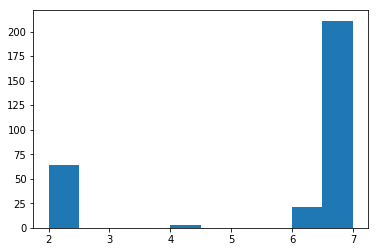

In [39]:
process_input(file)

# Send report when done

In [57]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
 
fromaddr = "mael.fabien@gmail.com"
toaddr = "raphael.lederman@wanadoo.fr"
 
msg = MIMEMultipart()
 
msg['From'] = fromaddr
msg['To'] = toaddr
msg['Subject'] = "Prediction ready"
 
body = "Prediction is now ready, check result in attaxched file"
 
msg.attach(MIMEText(body, 'plain'))
 
filename = "/output/testplot.png"
attachment = open(filename, "rb")
 
part = MIMEBase('application', 'octet-stream')
part.set_payload((attachment).read())
encoders.encode_base64(part)
part.add_header('Content-Disposition', "attachment; filename= %s" % filename)
 
msg.attach(part)
 
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login(fromaddr, "*****")
text = msg.as_string()
server.sendmail(fromaddr, toaddr, text)
server.quit()

(221, b'2.0.0 closing connection k73sm2505912wmd.36 - gsmtp')